In [1]:
library(arules)
library(ggplot2)
library(dplyr)
library(tidyr)
library(ggExtra)
library(cowplot)
# Function to perform max-min normalization
max_min_normalize <- function(x) {

  min_val <- min(x, na.rm = TRUE)
  max_val <- max(x, na.rm = TRUE)
  
  normalized <- (x - min_val) / (max_val - min_val)
  
  return(normalized)
}


SyntaxError: invalid syntax (3735666178.py, line 8)

# First Iterations

In [2]:
data = read.csv("data_model_complete.csv")

In [99]:
df <- data %>%
    arrange(Week, -nHab)

In [72]:
unique(df$Mun)

[1] "BARCELONA"                  "TERRASSA"                  
 [3] "BADALONA"                   "SABADELL"                  
 [5] "LLEIDA"                     "TARRAGONA"                 
 [7] "MATARÓ"                     "SANTA COLOMA DE GRAMENET"  
 [9] "REUS"                       "GIRONA"                    
[11] "SANT CUGAT DEL VALLÈS"      "RUBÍ"                      
[13] "VILANOVA I LA GELTRÚ"       "GRANOLLERS"                
[15] "CERDANYOLA DEL VALLÈS"      "SANT FELIU DE LLOBREGAT"   
[17] "IGUALADA"                   "VILAFRANCA DEL PENEDÈS"    
[19] "RIPOLLET"                   "LLORET DE MAR"             
[21] "EL VENDRELL"                "MONTCADA I REIXAC"         
[23] "OLOT"                       "TORTOSA"                   
[25] "BARBERÀ DEL VALLÈS"         "SALT"                      
[27] "MARTORELL"                  "SALOU"                     
[29] "SANT VICENÇ DELS HORTS"     "SANT ANDREU DE LA BARCA"   
[31] "MOLINS DE REI"              "OLESA DE MONTSERRAT"       
[33] "VILA-SECA"                  "ESPARREGUERA"              
[35] "AMPOSTA"                    "VILASSAR DE MAR"           
[37] "SANT QUIRZE DEL VALLÈS"     "BANYOLES"                  
[39] "ROSES"                      "BALAGUER"                  
[41] "BERGA"                      "VALLIRANA"                 
[43] "CORBERA DE LLOBREGAT"       "VILANOVA DEL CAMÍ"         
[45] "CASTELLBISBAL"              "ABRERA"                    
[47] "ARGENTONA"                  "LA SEU D'URGELL"           
[49] "MONTGAT"                    "SANTA MARGARIDA DE MONTBUI"
[51] "CERVERA"                    "SALLENT"                   
[53] "CONSTANTÍ"                  "ARTÉS"                     
[55] "SARRIÀ DE TER"              "VIC"                       
[57] "FIGUERES"                   "BLANES"                    
[59] "PALAFRUGELL"                "MANLLEU"                   
[61] "PARETS DEL VALLÈS"          "PALAMÓS"                   
[63] "TÀRREGA"                    "VILASSAR DE DALT"          
[65] "MONTBLANC"                  "TREMP"                     
[67] "VILAFANT"                   "SANTA EUGÈNIA DE BERGA"    
[69] "SANT FELIU DE GUÍXOLS"      "SANT HIPÒLIT DE VOLTREGÀ"  
[71] "SANT JOAN LES FONTS"        "FALSET"

In [100]:
df$Week <- factor(df$Week, levels = unique(df$Week))

# nhab is a bit more complicated issue
agg_df <- df %>% group_by(Mun) %>% summarise(nHab_mean = mean(nHab))

ordered_muns <- agg_df$Mun[order(agg_df$nHab_mean)]
df$Mun <- factor(df$Mun, levels = ordered_muns)

In [101]:
df$Mun

[1] BARCELONA                  TERRASSA                  
   [3] BADALONA                   SABADELL                  
   [5] LLEIDA                     TARRAGONA                 
   [7] MATARÓ                     SANTA COLOMA DE GRAMENET  
   [9] REUS                       GIRONA                    
  [11] SANT CUGAT DEL VALLÈS      RUBÍ                      
  [13] RUBÍ                       VILANOVA I LA GELTRÚ      
  [15] GRANOLLERS                 CERDANYOLA DEL VALLÈS     
  [17] SANT FELIU DE LLOBREGAT    IGUALADA                  
  [19] VILAFRANCA DEL PENEDÈS     RIPOLLET                  
  [21] LLORET DE MAR              EL VENDRELL               
  [23] MONTCADA I REIXAC          OLOT                      
  [25] TORTOSA                    BARBERÀ DEL VALLÈS        
  [27] SALT                       MARTORELL                 
  [29] SALOU                      SANT VICENÇ DELS HORTS    
  [31] SANT ANDREU DE LA BARCA    MOLINS DE REI             
  [33] OLESA DE MONTSERRAT        VILA-SECA                 
  [35] ESPARREGUERA               AMPOSTA                   
  [37] VILASSAR DE MAR            SANT QUIRZE DEL VALLÈS    
  [39] BANYOLES                   ROSES                     
  [41] BALAGUER                   BERGA                     
  [43] VALLIRANA                  CORBERA DE LLOBREGAT      
  [45] VILANOVA DEL CAMÍ          CASTELLBISBAL             
  [47] ABRERA                     ARGENTONA                 
  [49] LA SEU D'URGELL            MONTGAT                   
  [51] SANTA MARGARIDA DE MONTBUI CERVERA                   
  [53] SALLENT                    CONSTANTÍ                 
  [55] ARTÉS                      SARRIÀ DE TER             
  [57] BARCELONA                  TERRASSA                  
  [59] BADALONA                   SABADELL                  
  [61] LLEIDA                     TARRAGONA                 
  [63] MATARÓ                     SANTA COLOMA DE GRAMENET  
  [65] REUS                       GIRONA                    
  [67] SANT CUGAT DEL VALLÈS      RUBÍ                      
  [69] RUBÍ                       VILANOVA I LA GELTRÚ      
  [71] GRANOLLERS                 CERDANYOLA DEL VALLÈS     
  [73] VIC                        FIGUERES                  
  [75] SANT FELIU DE LLOBREGAT    IGUALADA                  
  [77] VILAFRANCA DEL PENEDÈS     BLANES                    
  [79] RIPOLLET                   EL VENDRELL               
  [81] MONTCADA I REIXAC          OLOT                      
  [83] TORTOSA                    BARBERÀ DEL VALLÈS        
  [85] SALT                       MARTORELL                 
  [87] SALOU                      SANT VICENÇ DELS HORTS    
  [89] SANT ANDREU DE LA BARCA    MOLINS DE REI             
  [91] OLESA DE MONTSERRAT        PALAFRUGELL               
  [93] VILA-SECA                  ESPARREGUERA              
  [95] AMPOSTA                    VILASSAR DE MAR           
  [97] MANLLEU                    SANT QUIRZE DEL VALLÈS    
  [99] BANYOLES                   PARETS DEL VALLÈS         
 [101] PALAMÓS                    BALAGUER                  
 [103] TÀRREGA                    BERGA                     
 [105] VALLIRANA                  CORBERA DE LLOBREGAT      
 [107] VILANOVA DEL CAMÍ          CASTELLBISBAL             
 [109] ABRERA                     ARGENTONA                 
 [111] LA SEU D'URGELL            MONTGAT                   
 [113] SANTA MARGARIDA DE MONTBUI VILASSAR DE DALT          
 [115] MONTBLANC                  SALLENT                   
 [117] CONSTANTÍ                  TREMP                     
 [119] ARTÉS                      VILAFANT                  
 [121] SARRIÀ DE TER              SANTA EUGÈNIA DE BERGA    
 [123] BARCELONA                  TERRASSA                  
 [125] BADALONA                   SABADELL                  
 [127] LLEIDA                     TARRAGONA                 
 [129] MATARÓ                     SANTA COLOMA DE GRAMENET  
 [131] REUS                       GIRO

In [102]:
n = 5
df$nHab_disc = discretize(
    df$nHab,
    method = "frequency",
    breaks = n,
    labels = seq(1,n)
)

In [103]:
unique(df$nHab_disc)

[1] 5 4 3 2 1
Levels: 1 2 3 4 5

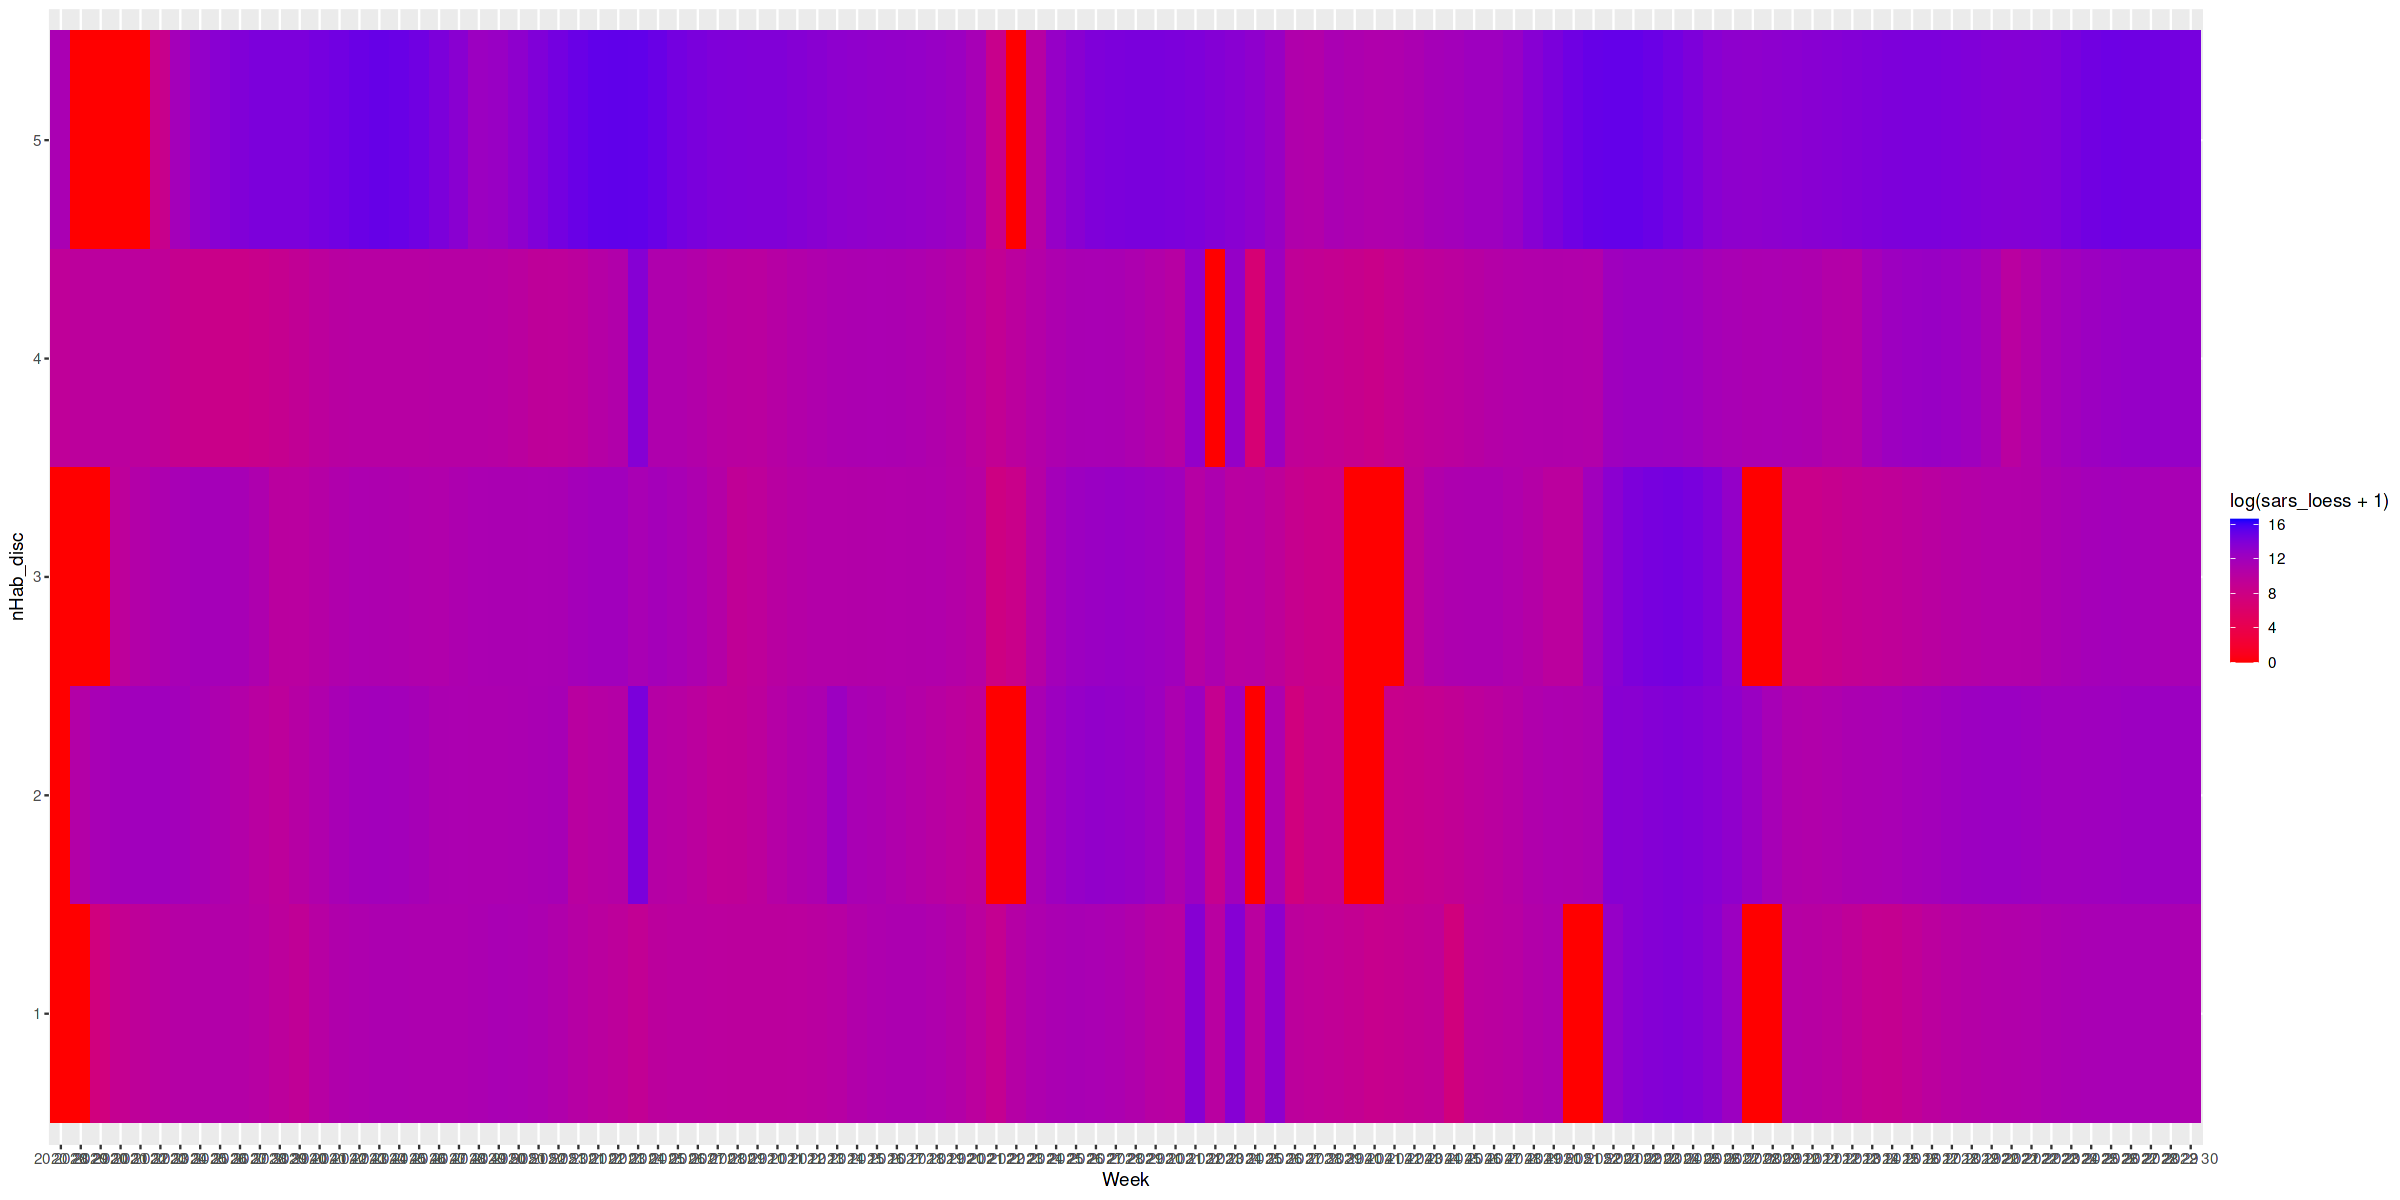

In [104]:
options(repr.plot.width = 20, repr.plot.height = 10)

ggplot(df, aes(x = Week, y = nHab_disc, fill = log(sars_loess+1))) +
    geom_tile() +
    scale_fill_gradient(low = "red", high = "blue")

In [105]:
df_disc <- df %>%
    group_by(Week, nHab_disc) %>%
    summarise(
        sum_sars = median(log(sars_loess+1), na.rm = T),
        sum_cases = median(Ncasos, na.rm = T)
    )


df_disc <- df_disc %>%
    group_by(nHab_disc) %>%
    mutate(
        sc_sars = scale(sum_sars),
        sc_cases = scale(sum_cases)
    ) %>% ungroup()

`summarise()` has grouped output by 'Week'. You can override using the
`.groups` argument.


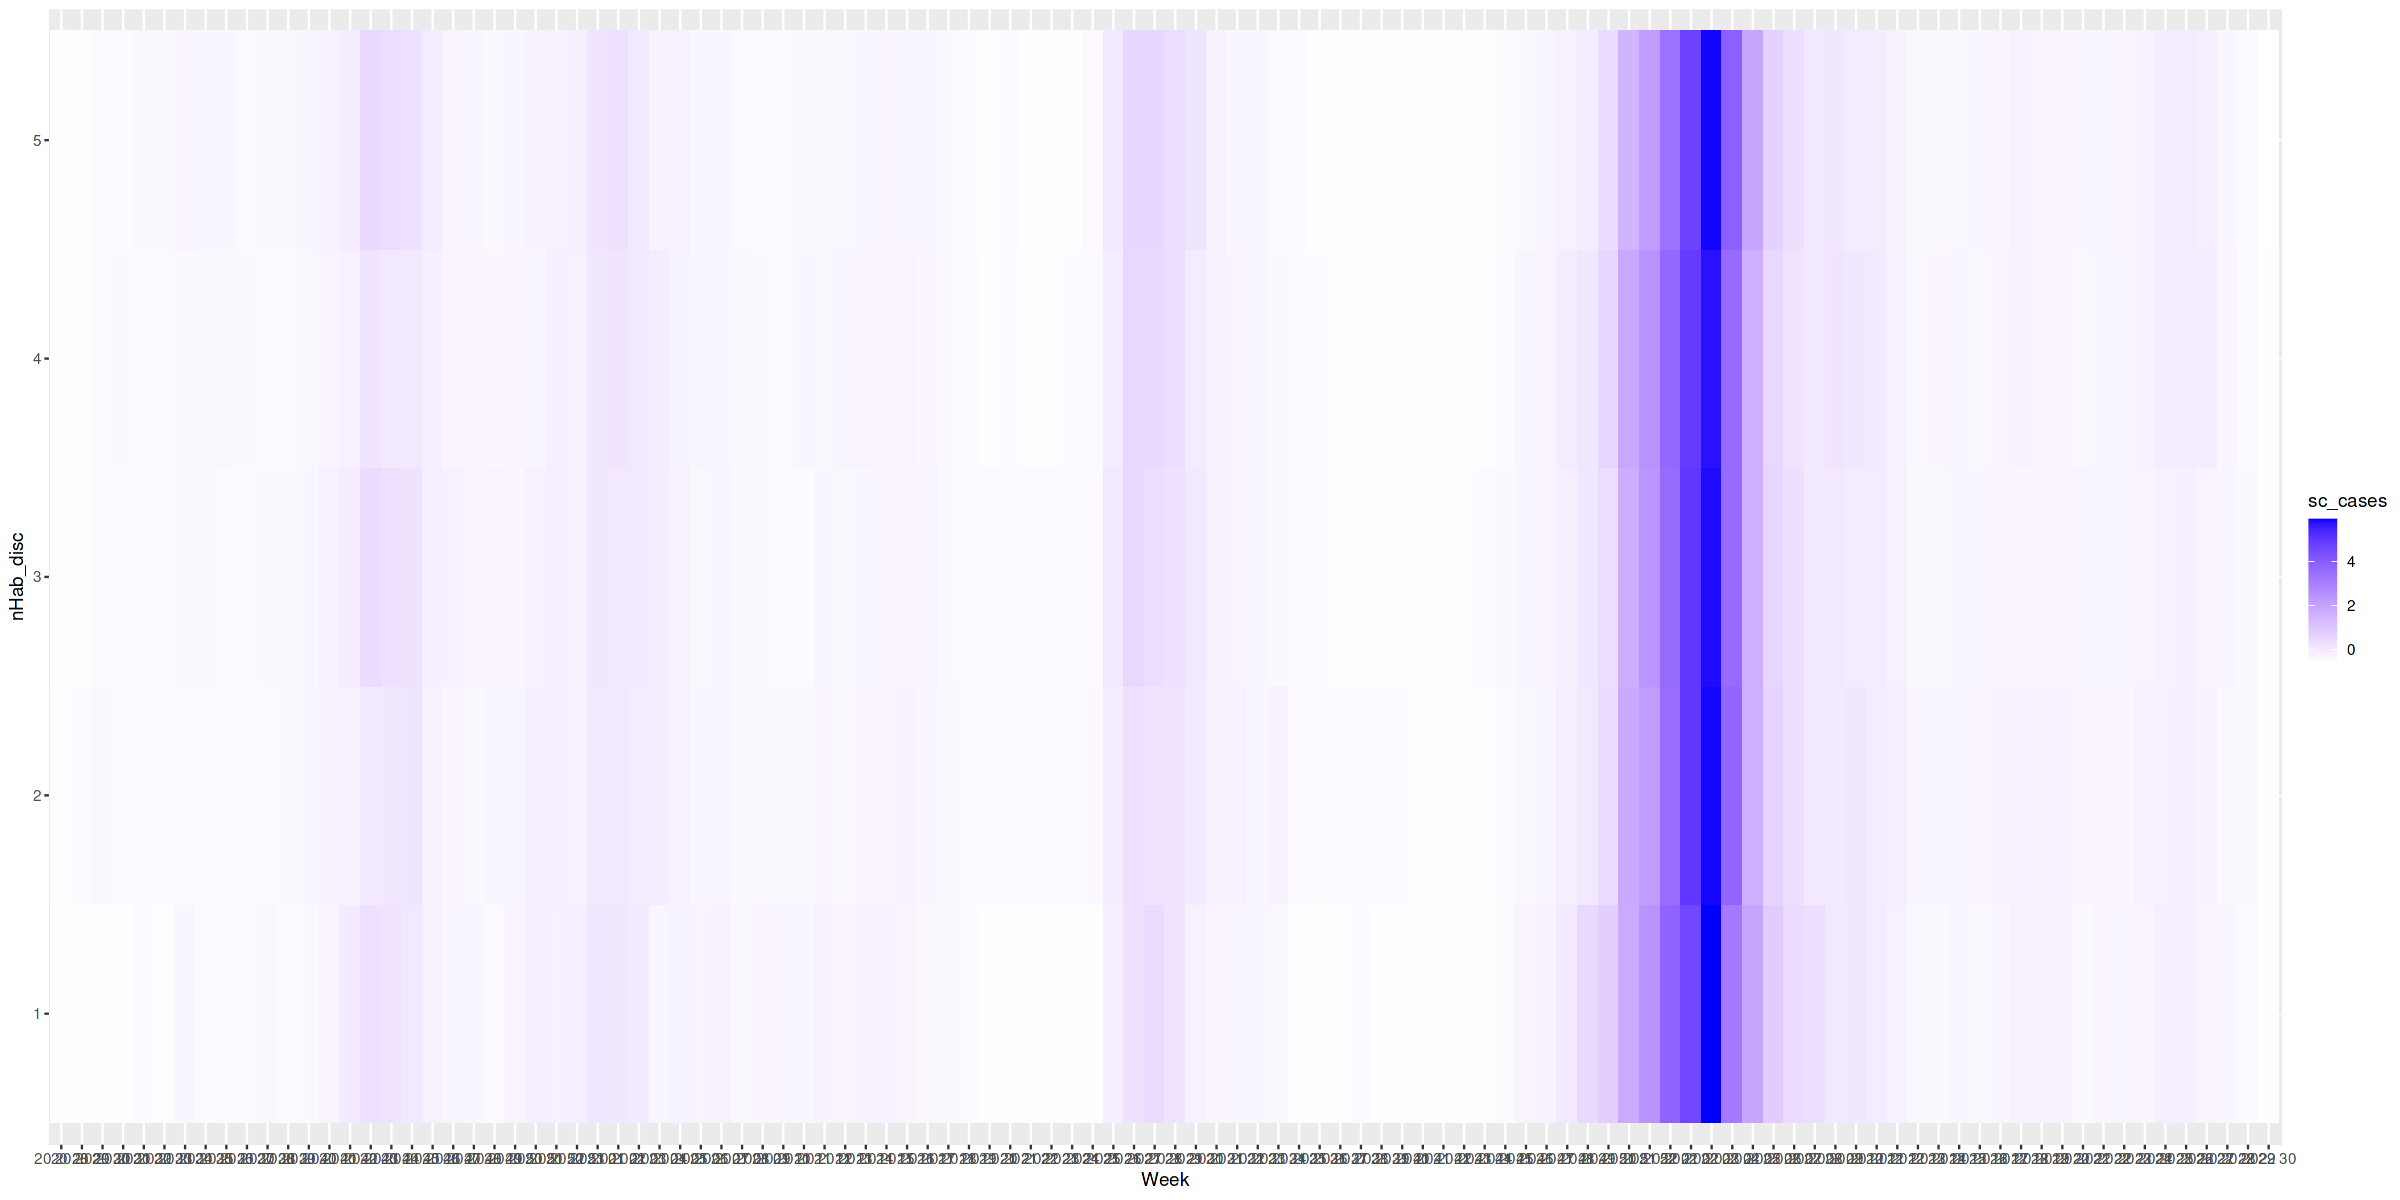

In [106]:
options(repr.plot.width = 20, repr.plot.height = 10)

ggplot(df_disc, aes(x = Week, y = nHab_disc, fill = sc_cases)) +
    geom_tile()+
    scale_fill_gradient(low = "white", high = "blue")

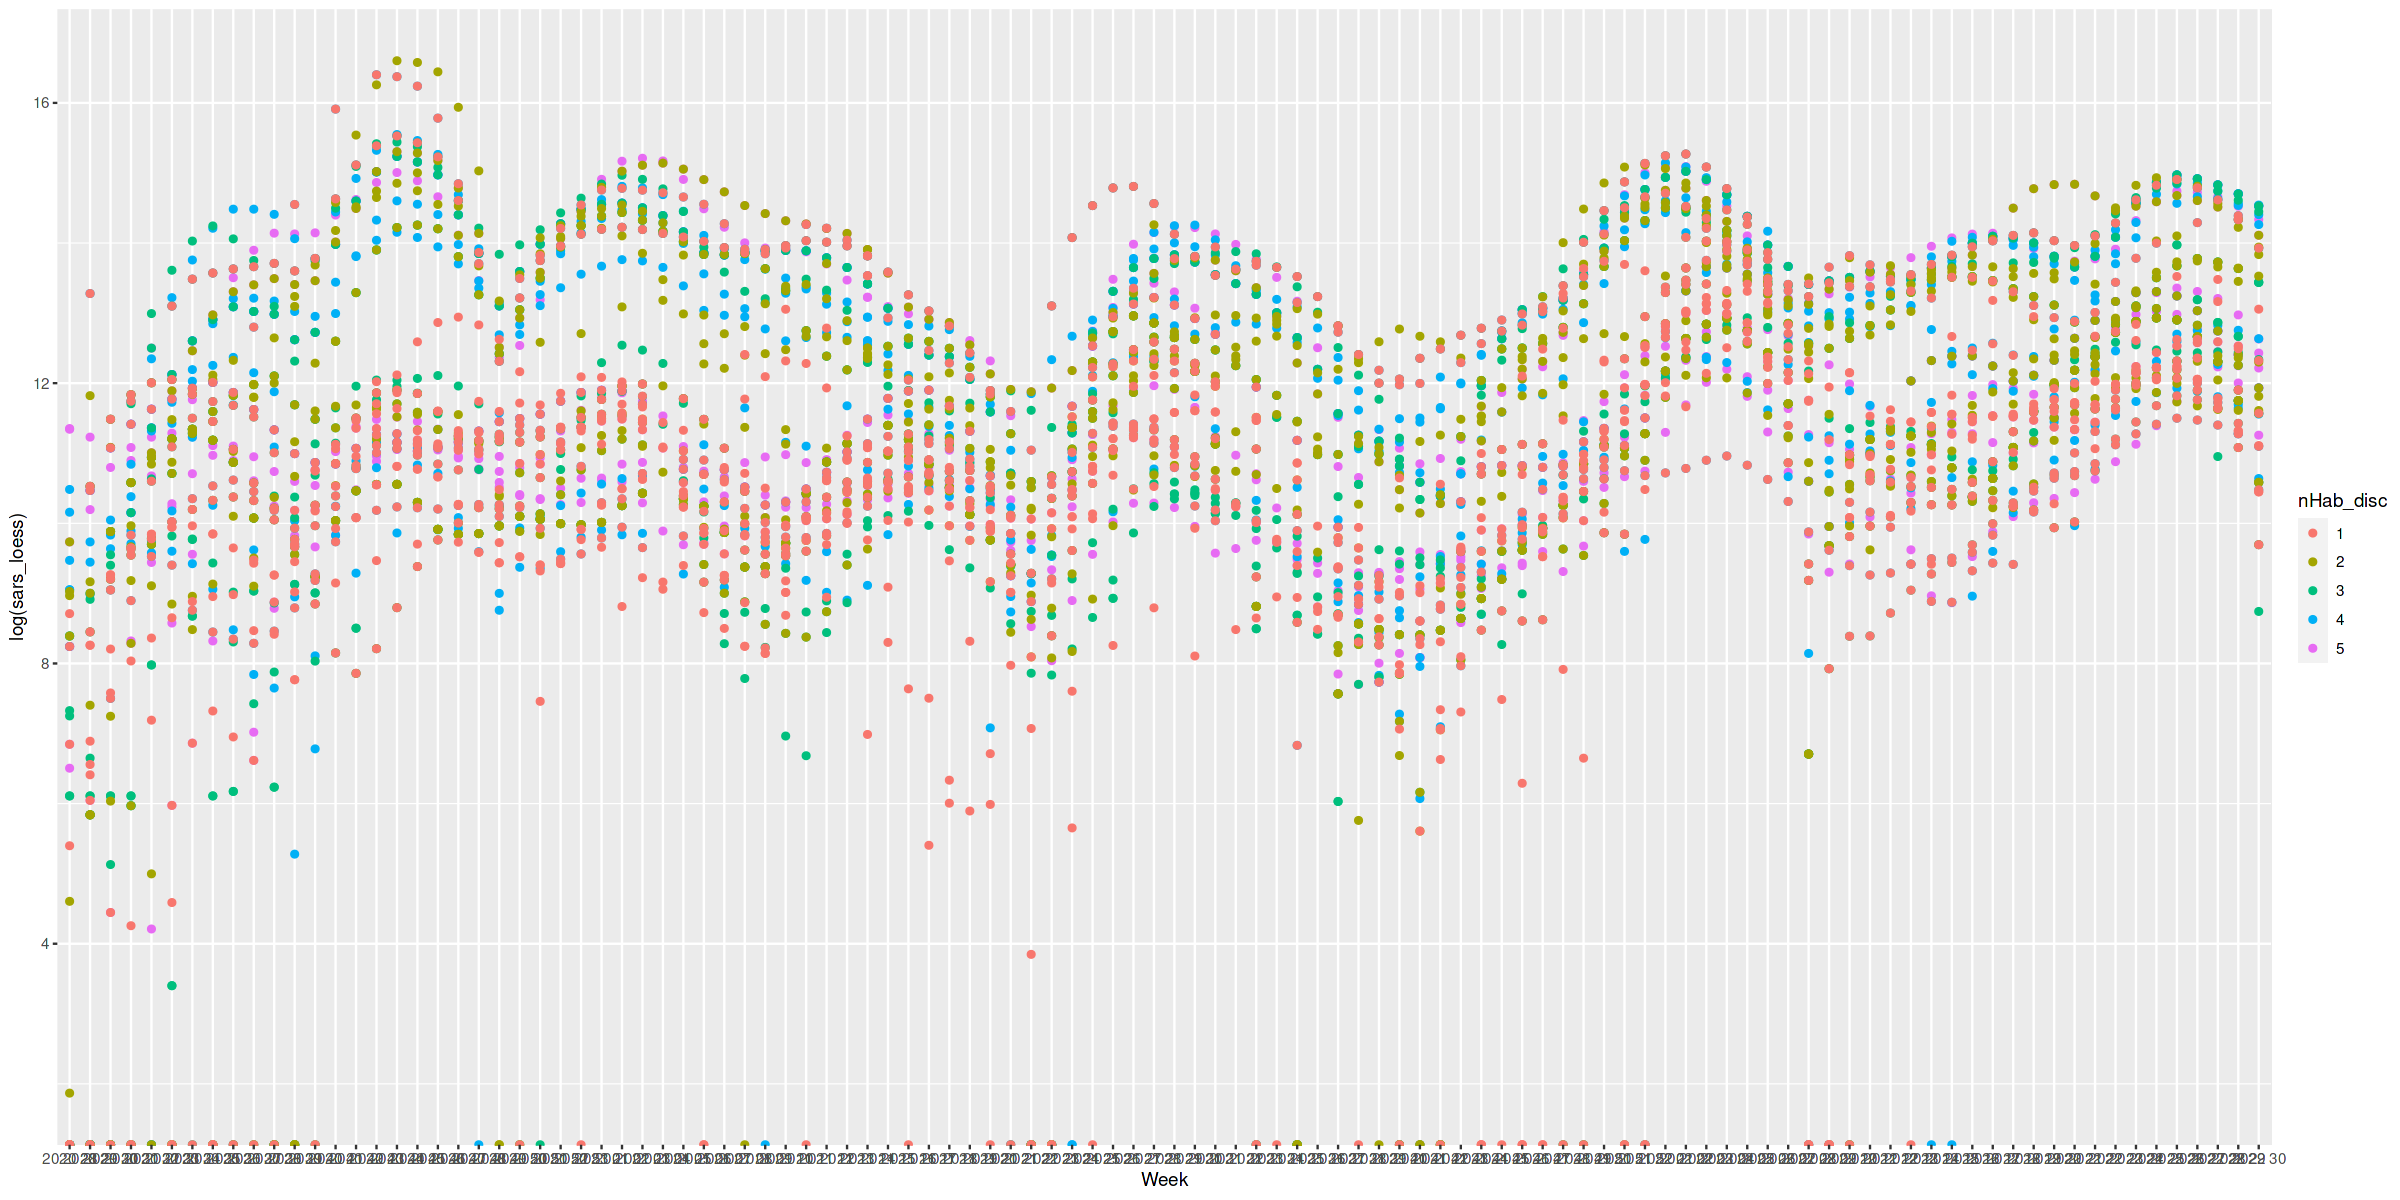

In [107]:
ggplot(data = df, aes(x = Week, y = log(sars_loess), color = nHab_disc)) + 
    geom_point() 

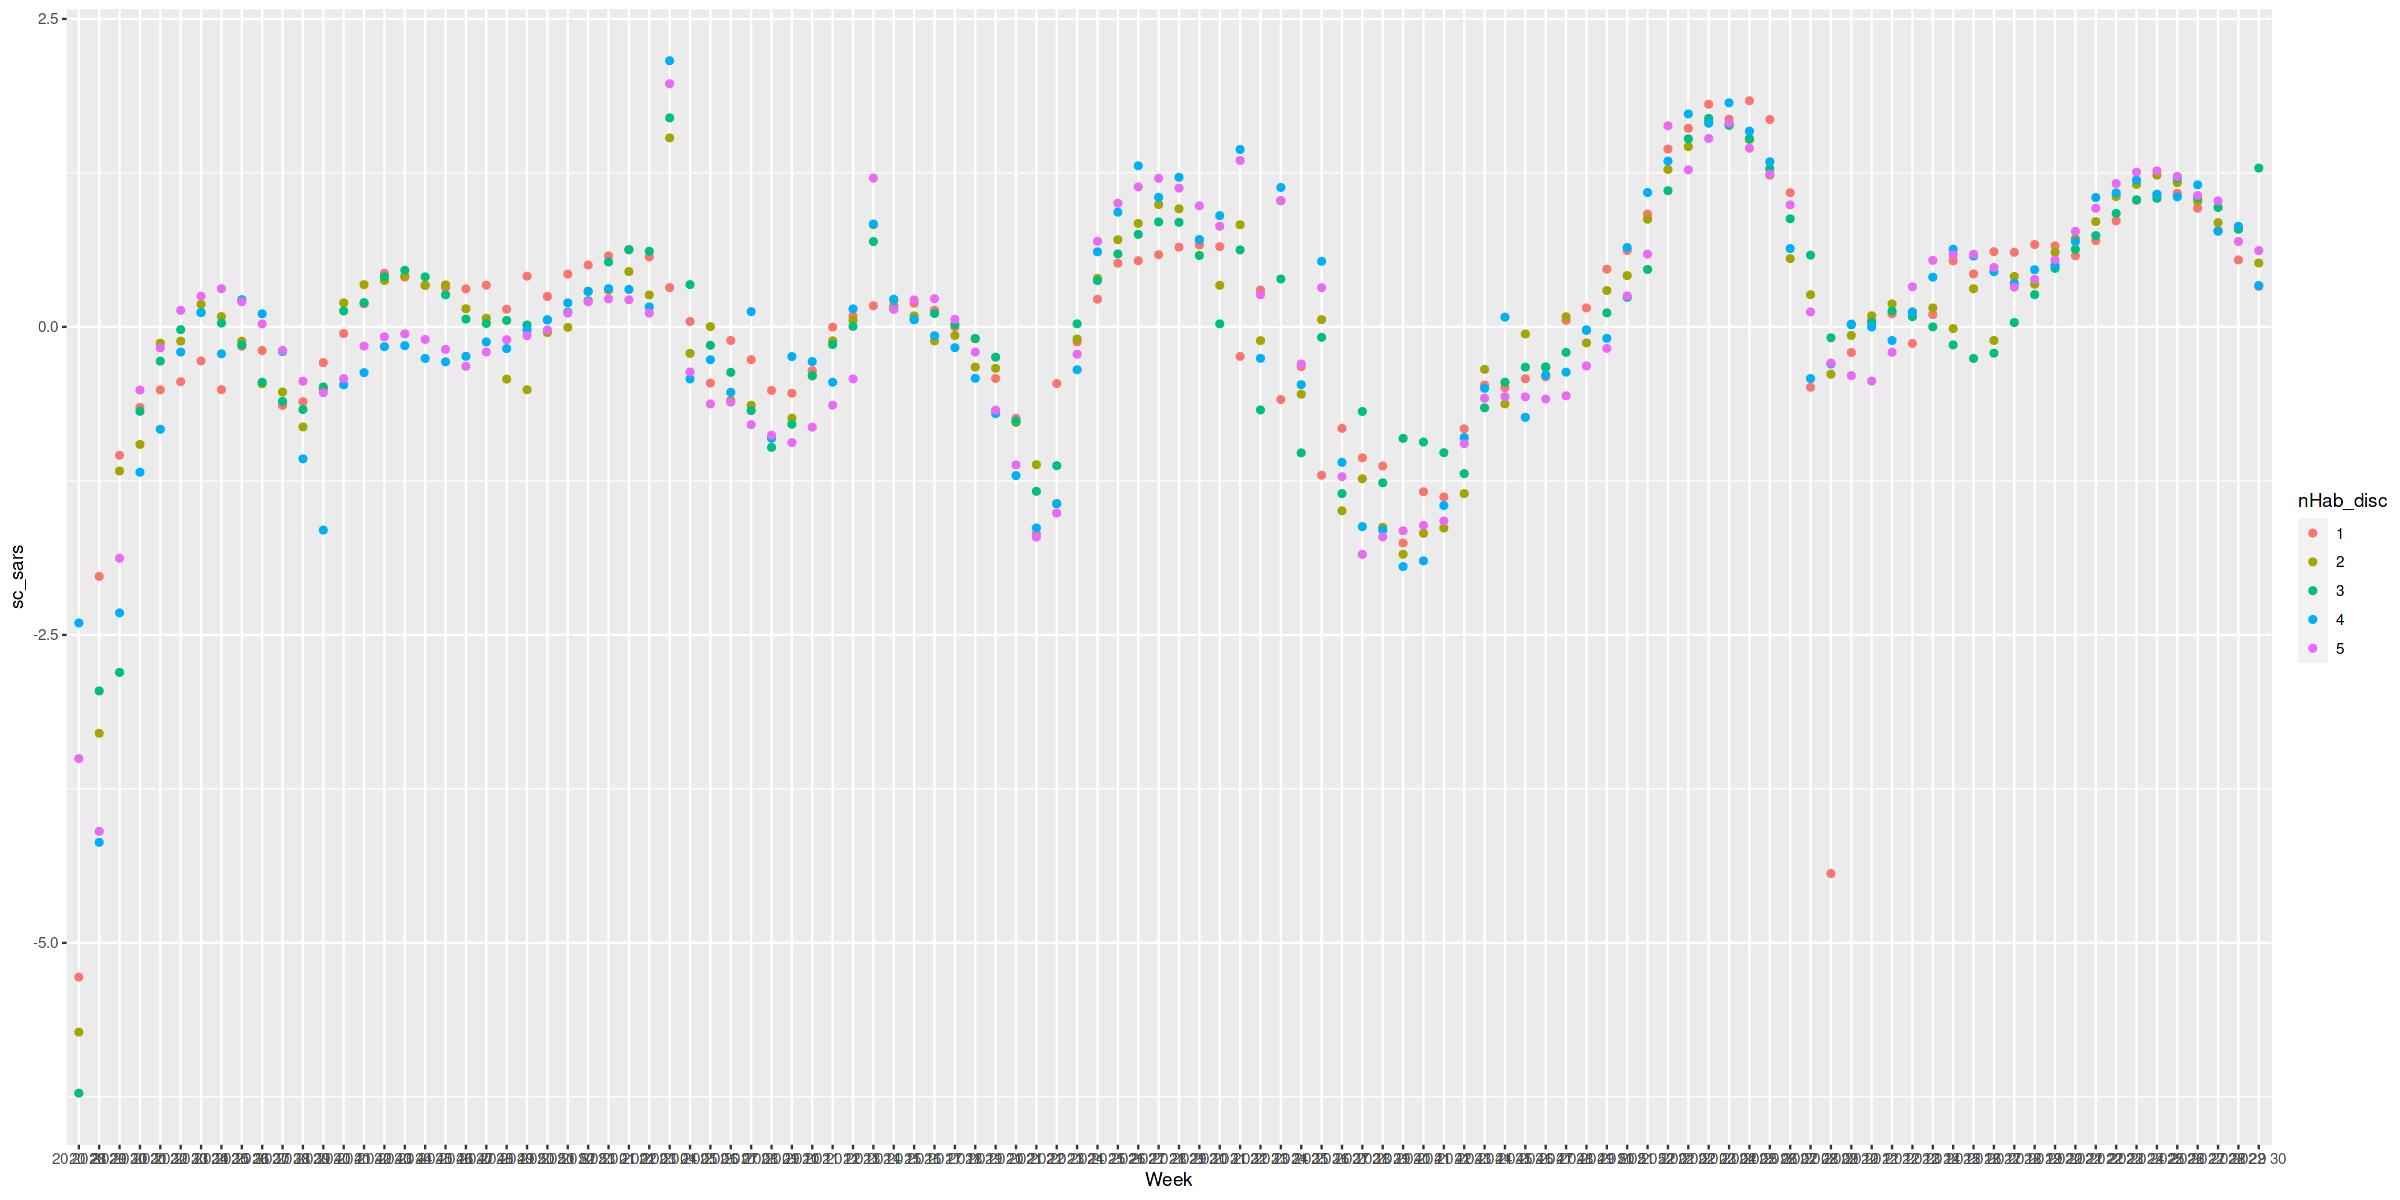

In [17]:
# con la agregación
ggplot(data = df_disc, aes(x = Week, y = sc_sars, color = nHab_disc)) + 
    geom_point() 

In [108]:
min(df_disc$sc_sars)
max(df_disc$sc_sars)

min(df_disc$sc_cases)
max(df_disc$sc_cases)

[1] -6.21954

[1] 2.160321

[1] -0.5686658

[1] 5.907905

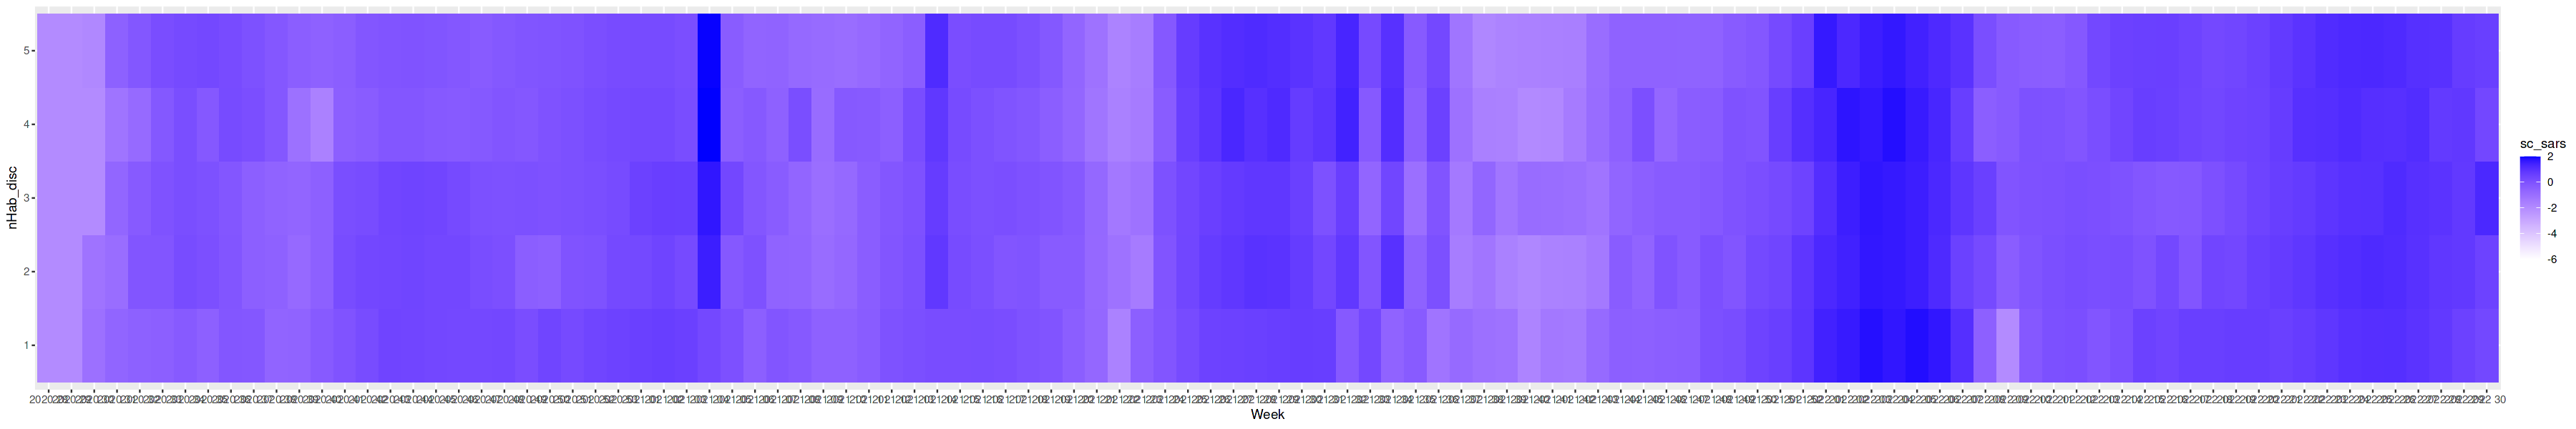

In [109]:
options(repr.plot.width = 30, repr.plot.height = 5)

df_disc2 <- df_disc
df_disc2$sc_cases <- pmin(df_disc2$sc_cases, 1.5)
df_disc2$sc_cases <- pmax(df_disc2$sc_cases, -0.56)
df_disc2$sc_sars <- pmin(df_disc2$sc_sars, 2)
df_disc2$sc_sars <- pmax(df_disc2$sc_sars, -2)

cases_limits = c(-0.7, 2)
sars_limits = c(-6,2)

ggplot(df_disc2, aes(x = Week, y = nHab_disc, fill = sc_sars)) +
    geom_tile()+
    scale_fill_gradient(low = "white", high = "blue",limits =sars_limits)

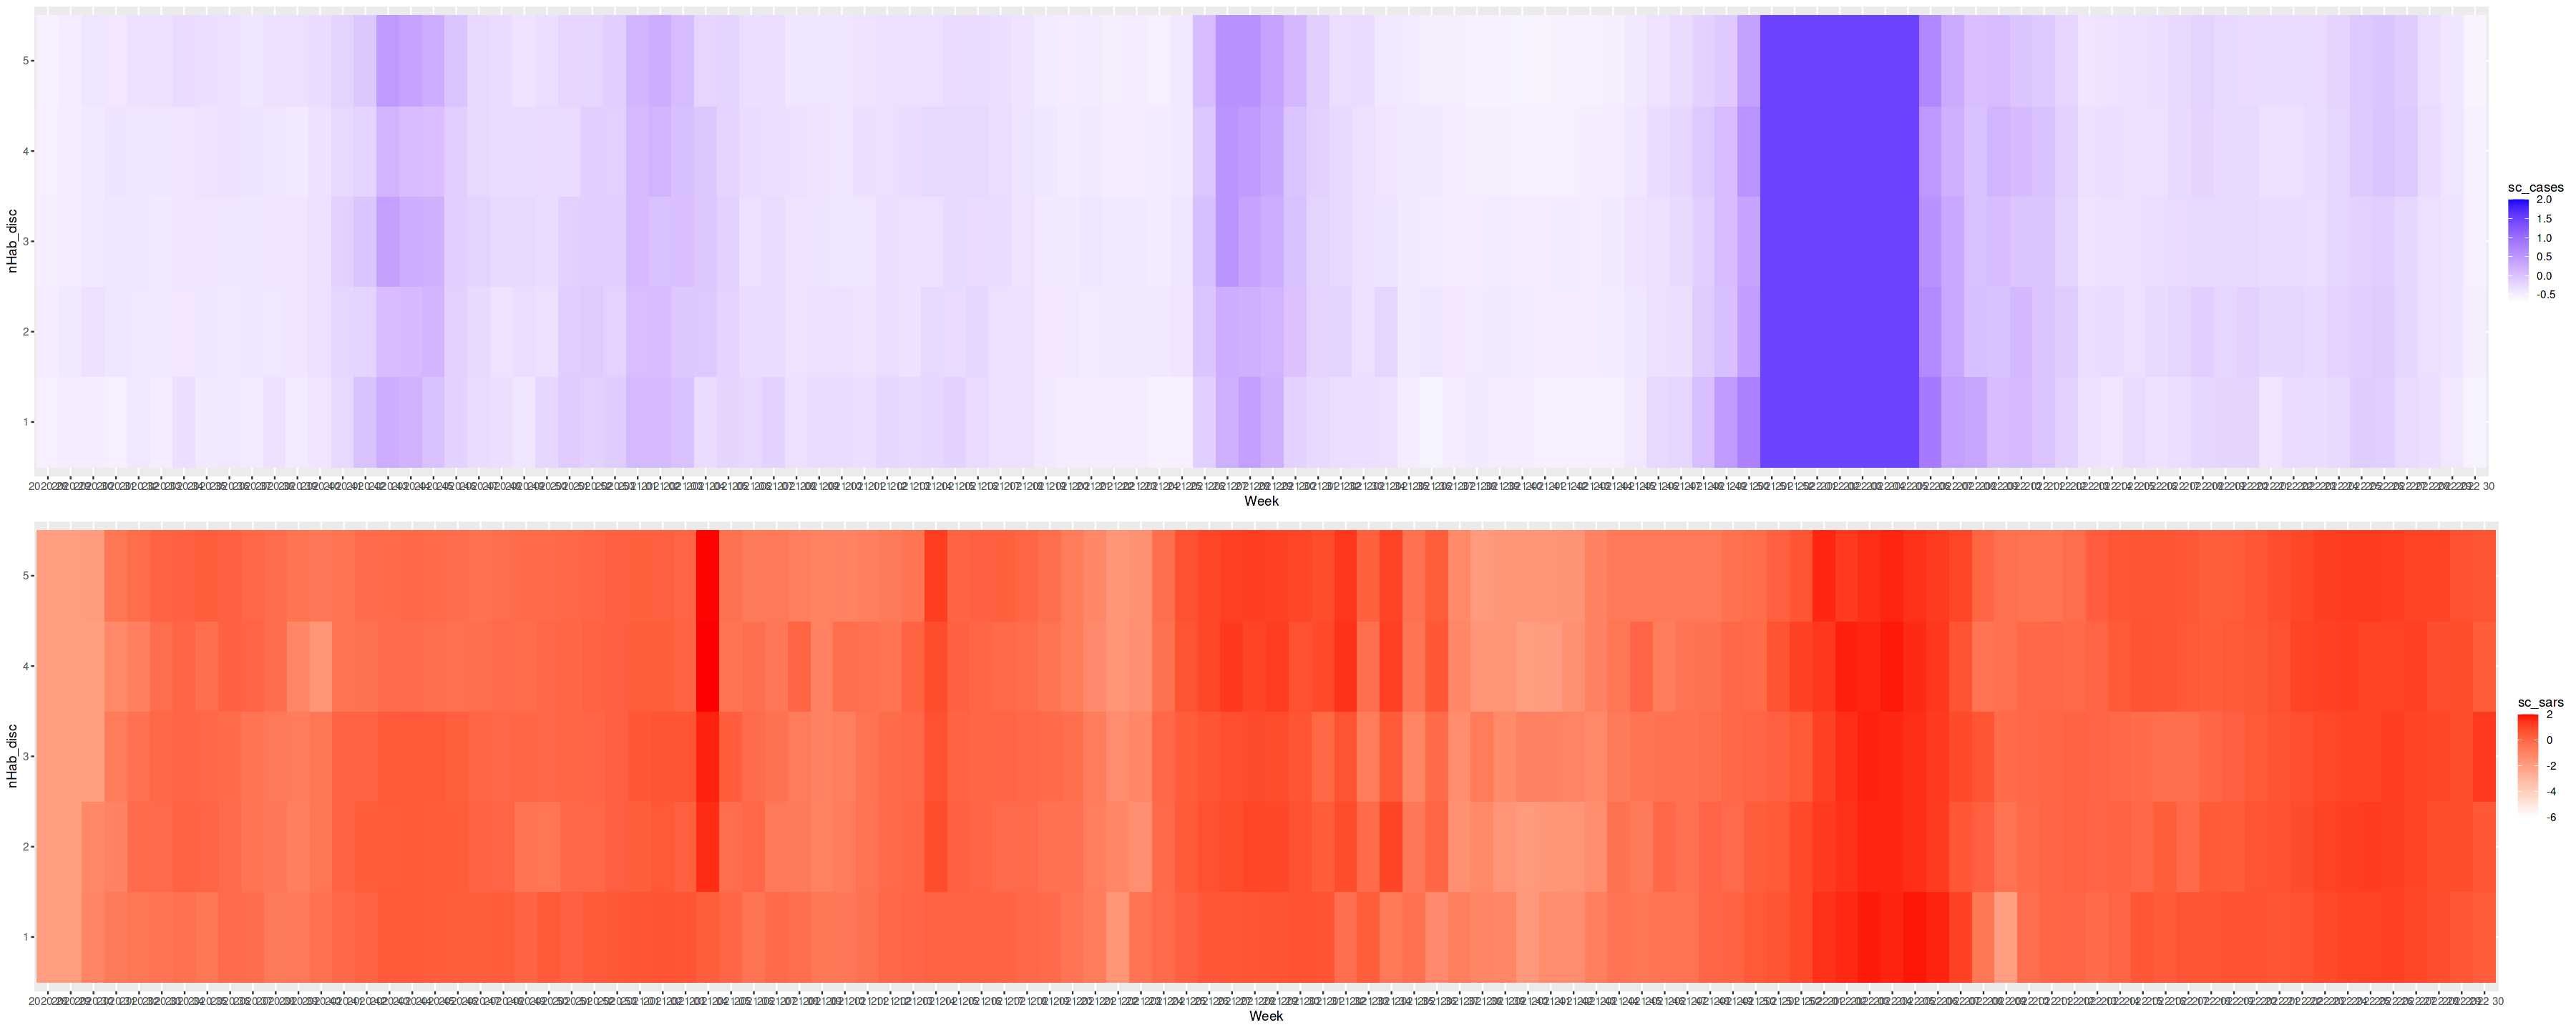

In [110]:
options(repr.plot.width = 30, repr.plot.height = 12)
g1 <- ggplot(df_disc2, aes(x = Week, y = nHab_disc, fill = sc_cases)) +
    geom_tile()+
    scale_fill_gradient(low = "white", high = "blue",limits =cases_limits)
g2 <- ggplot(df_disc2, aes(x = Week, y = nHab_disc, fill = sc_sars)) +
    geom_tile()+
    scale_fill_gradient(low = "white", high = "red",limits =sars_limits)

plot_grid(
    g1,g2,
    nrow = 2,
    ncol = 1
)

In [111]:
df_disc <- df %>%
    group_by(Week, nHab_disc) %>%
    summarise(
        sum_sars = mean(sars_loess, na.rm = T),
        sum_cases = mean(Ncasos, na.rm = T)
    )

`summarise()` has grouped output by 'Week'. You can override using the
`.groups` argument.


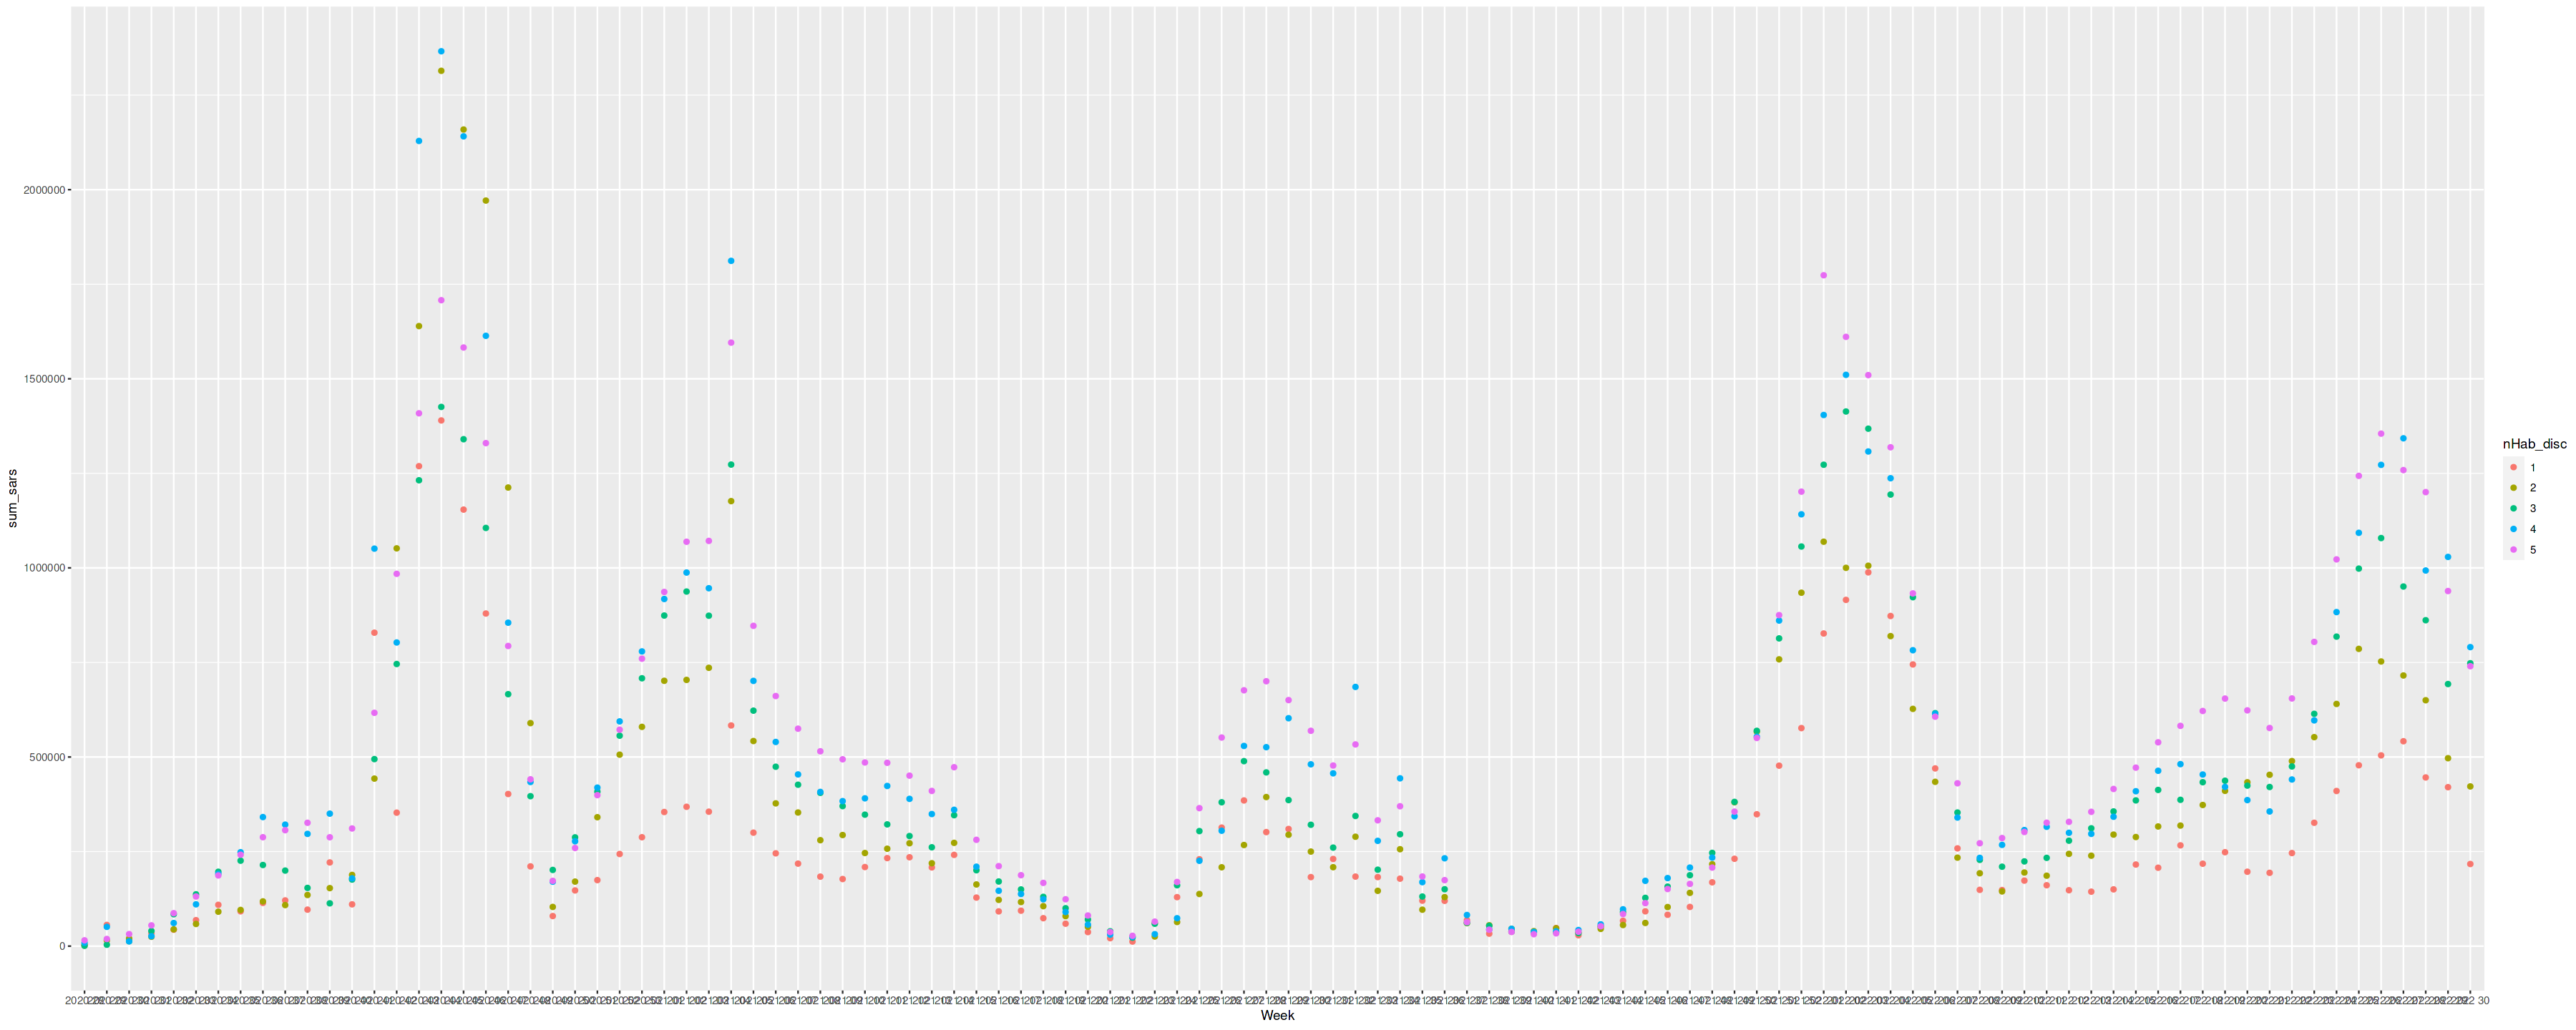

In [16]:
options(repr.plot.width = 30, repr.plot.height = 12)
ggplot(data = df_disc, aes(x = Week, y = sum_sars, color = nHab_disc)) + 
    geom_point() 

In [112]:
min(df_disc$sum_sars)
max(df_disc$sum_sars)

min(df_disc$sum_cases)
max(df_disc$sum_cases)

[1] 973.0544

[1] 2365939

[1] 1.8

[1] 8186.692

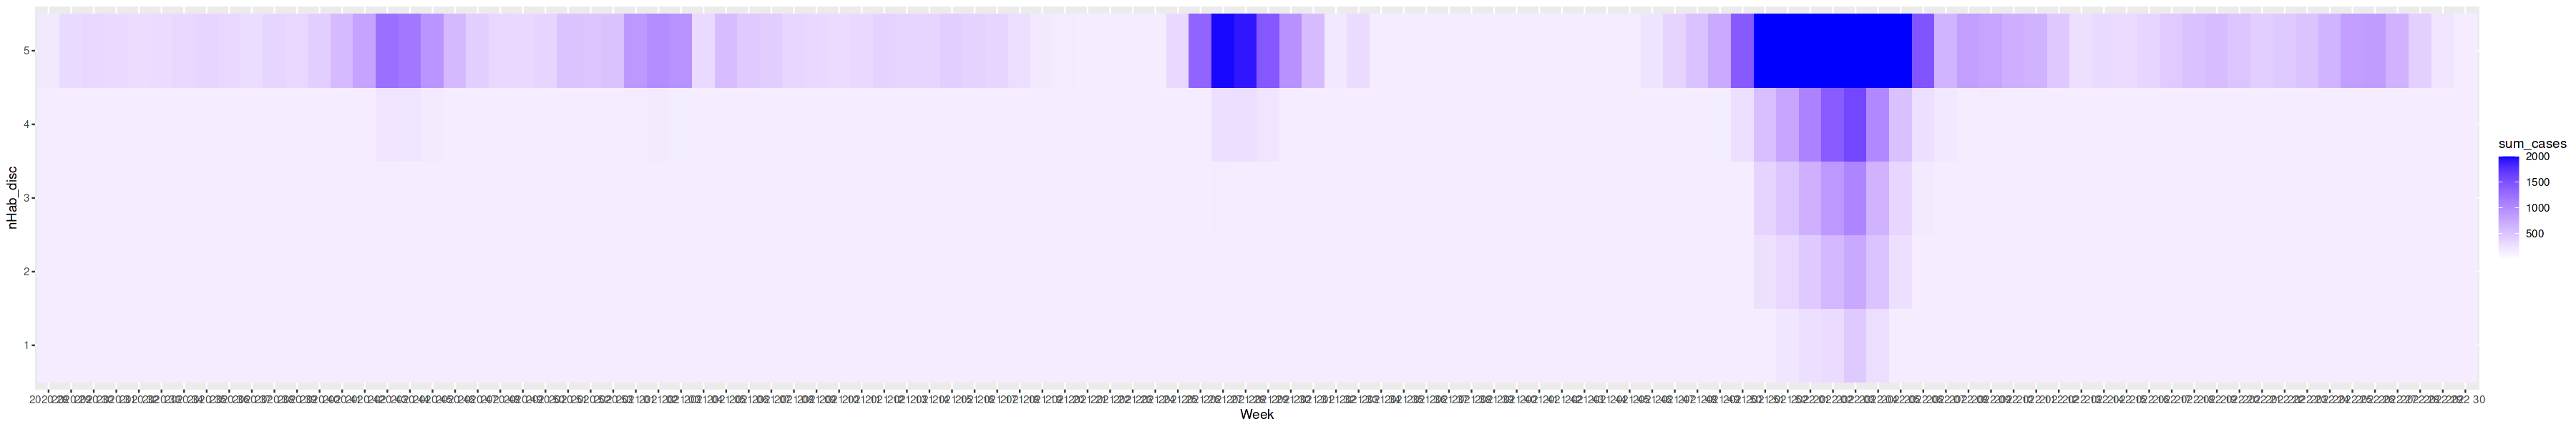

In [113]:
options(repr.plot.width = 30, repr.plot.height = 5)

df_disc2 <- df_disc
df_disc2$sum_cases <- pmin(df_disc2$sum_cases, 2000)
df_disc2$sum_cases <- pmax(df_disc2$sum_cases, 150)
df_disc2$sum_sars <- pmin(df_disc2$sum_sars, 2500000)
df_disc2$sum_sars <- pmax(df_disc2$sum_sars, 1)

cases_limits = c(1, 2000)
sars_limits = c(1,2500000)

ggplot(df_disc2, aes(x = Week, y = nHab_disc, fill = sum_cases)) +
    geom_tile()+
    scale_fill_gradient(low = "white", high = "blue", limits = cases_limits)

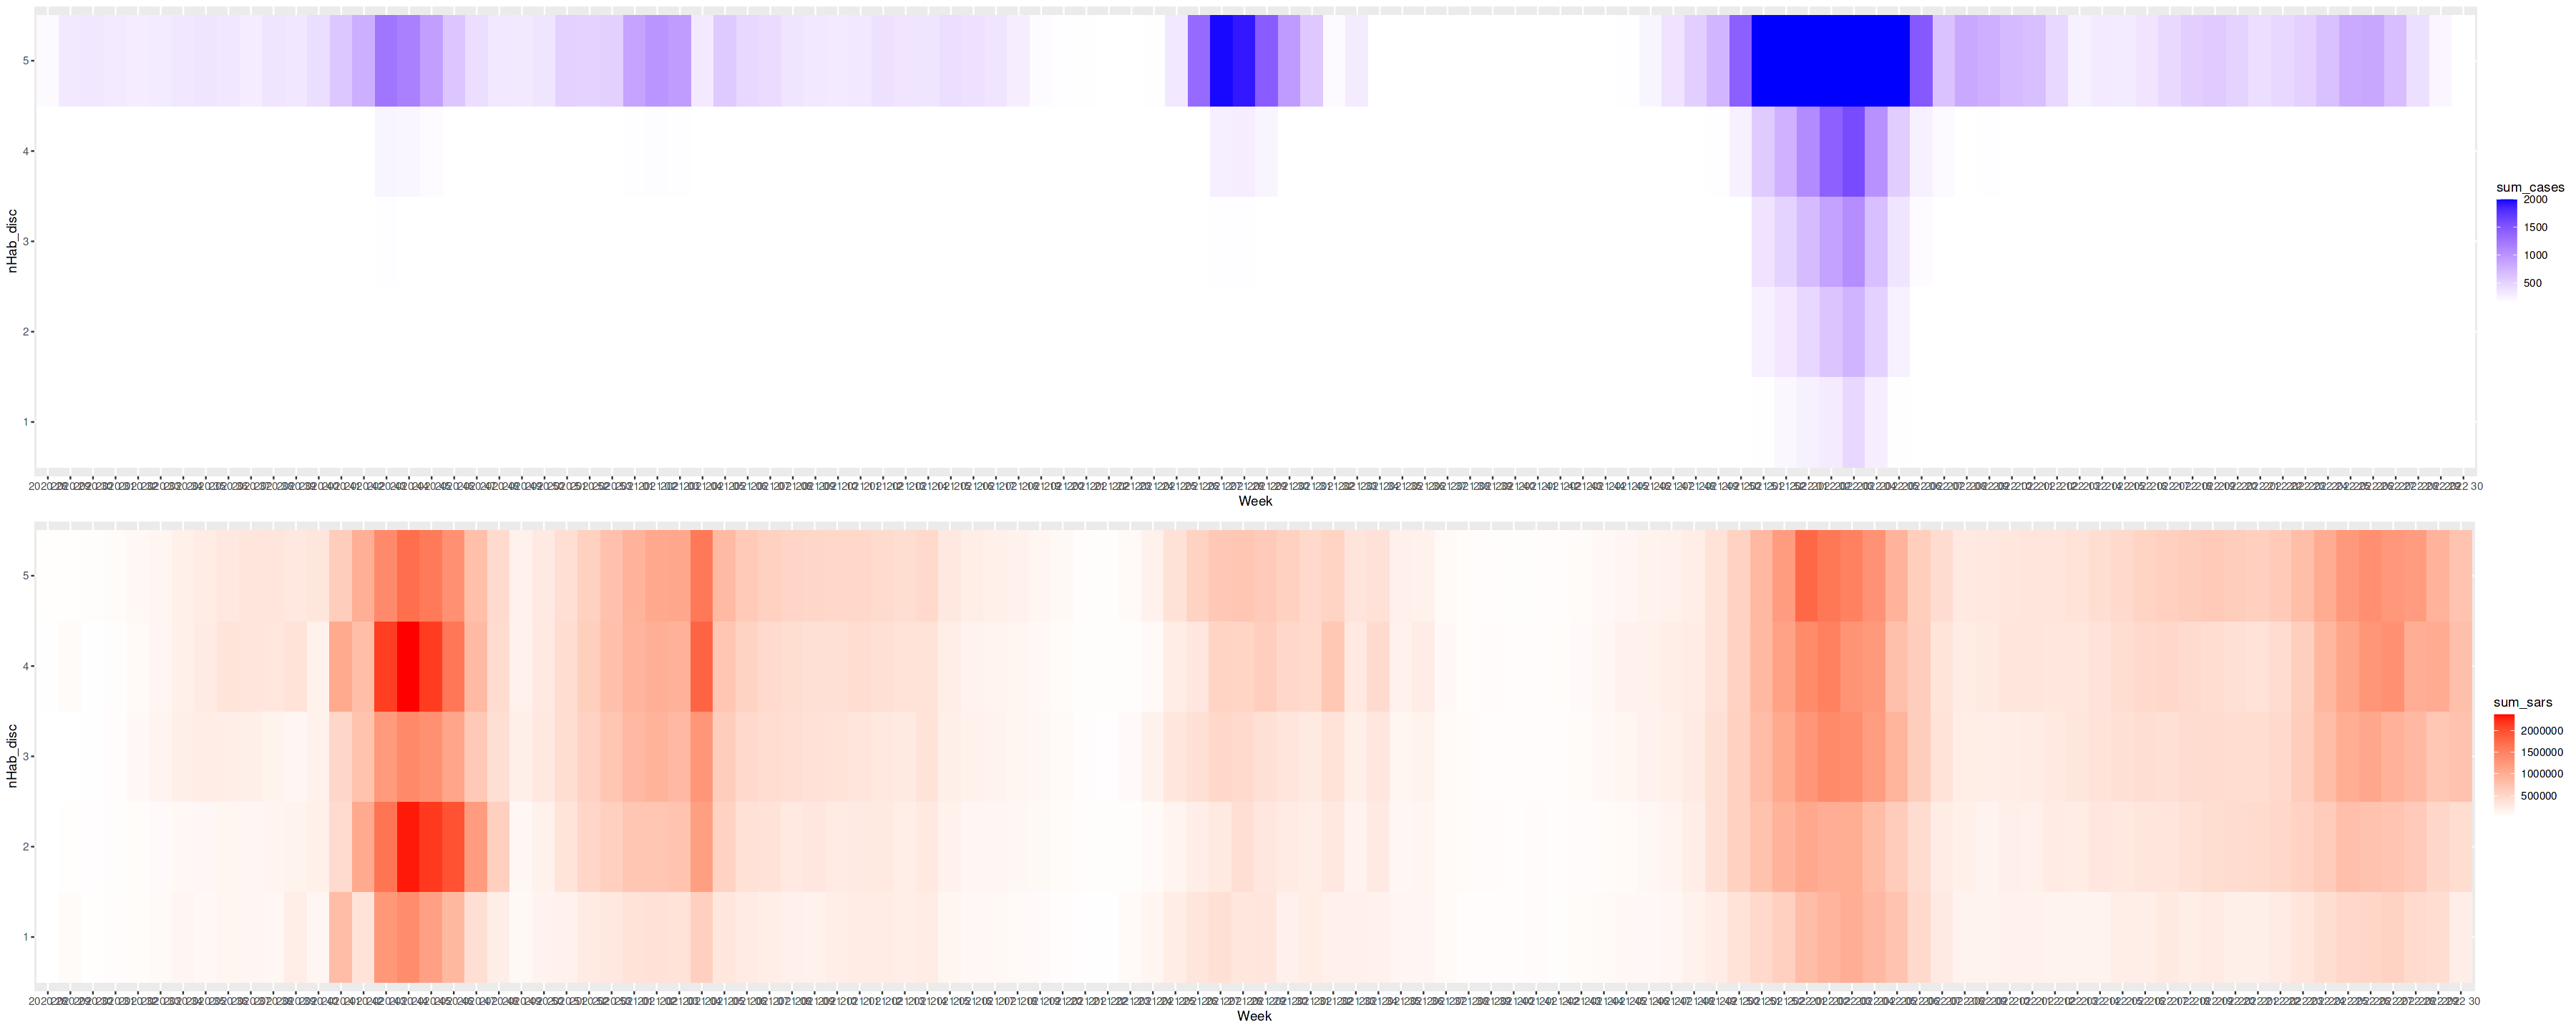

In [114]:
options(repr.plot.width = 30, repr.plot.height = 12)
g1 <- ggplot(df_disc2, aes(x = Week, y = nHab_disc, fill = sum_cases)) +
    geom_tile()+
    scale_fill_gradient(low = "white", high = "blue")
g2 <- ggplot(df_disc2, aes(x = Week, y = nHab_disc, fill = sum_sars)) +
    geom_tile()+
    scale_fill_gradient(low = "white", high = "red")

plot_grid(
    g1,g2,
    nrow = 2,
    ncol = 1
)

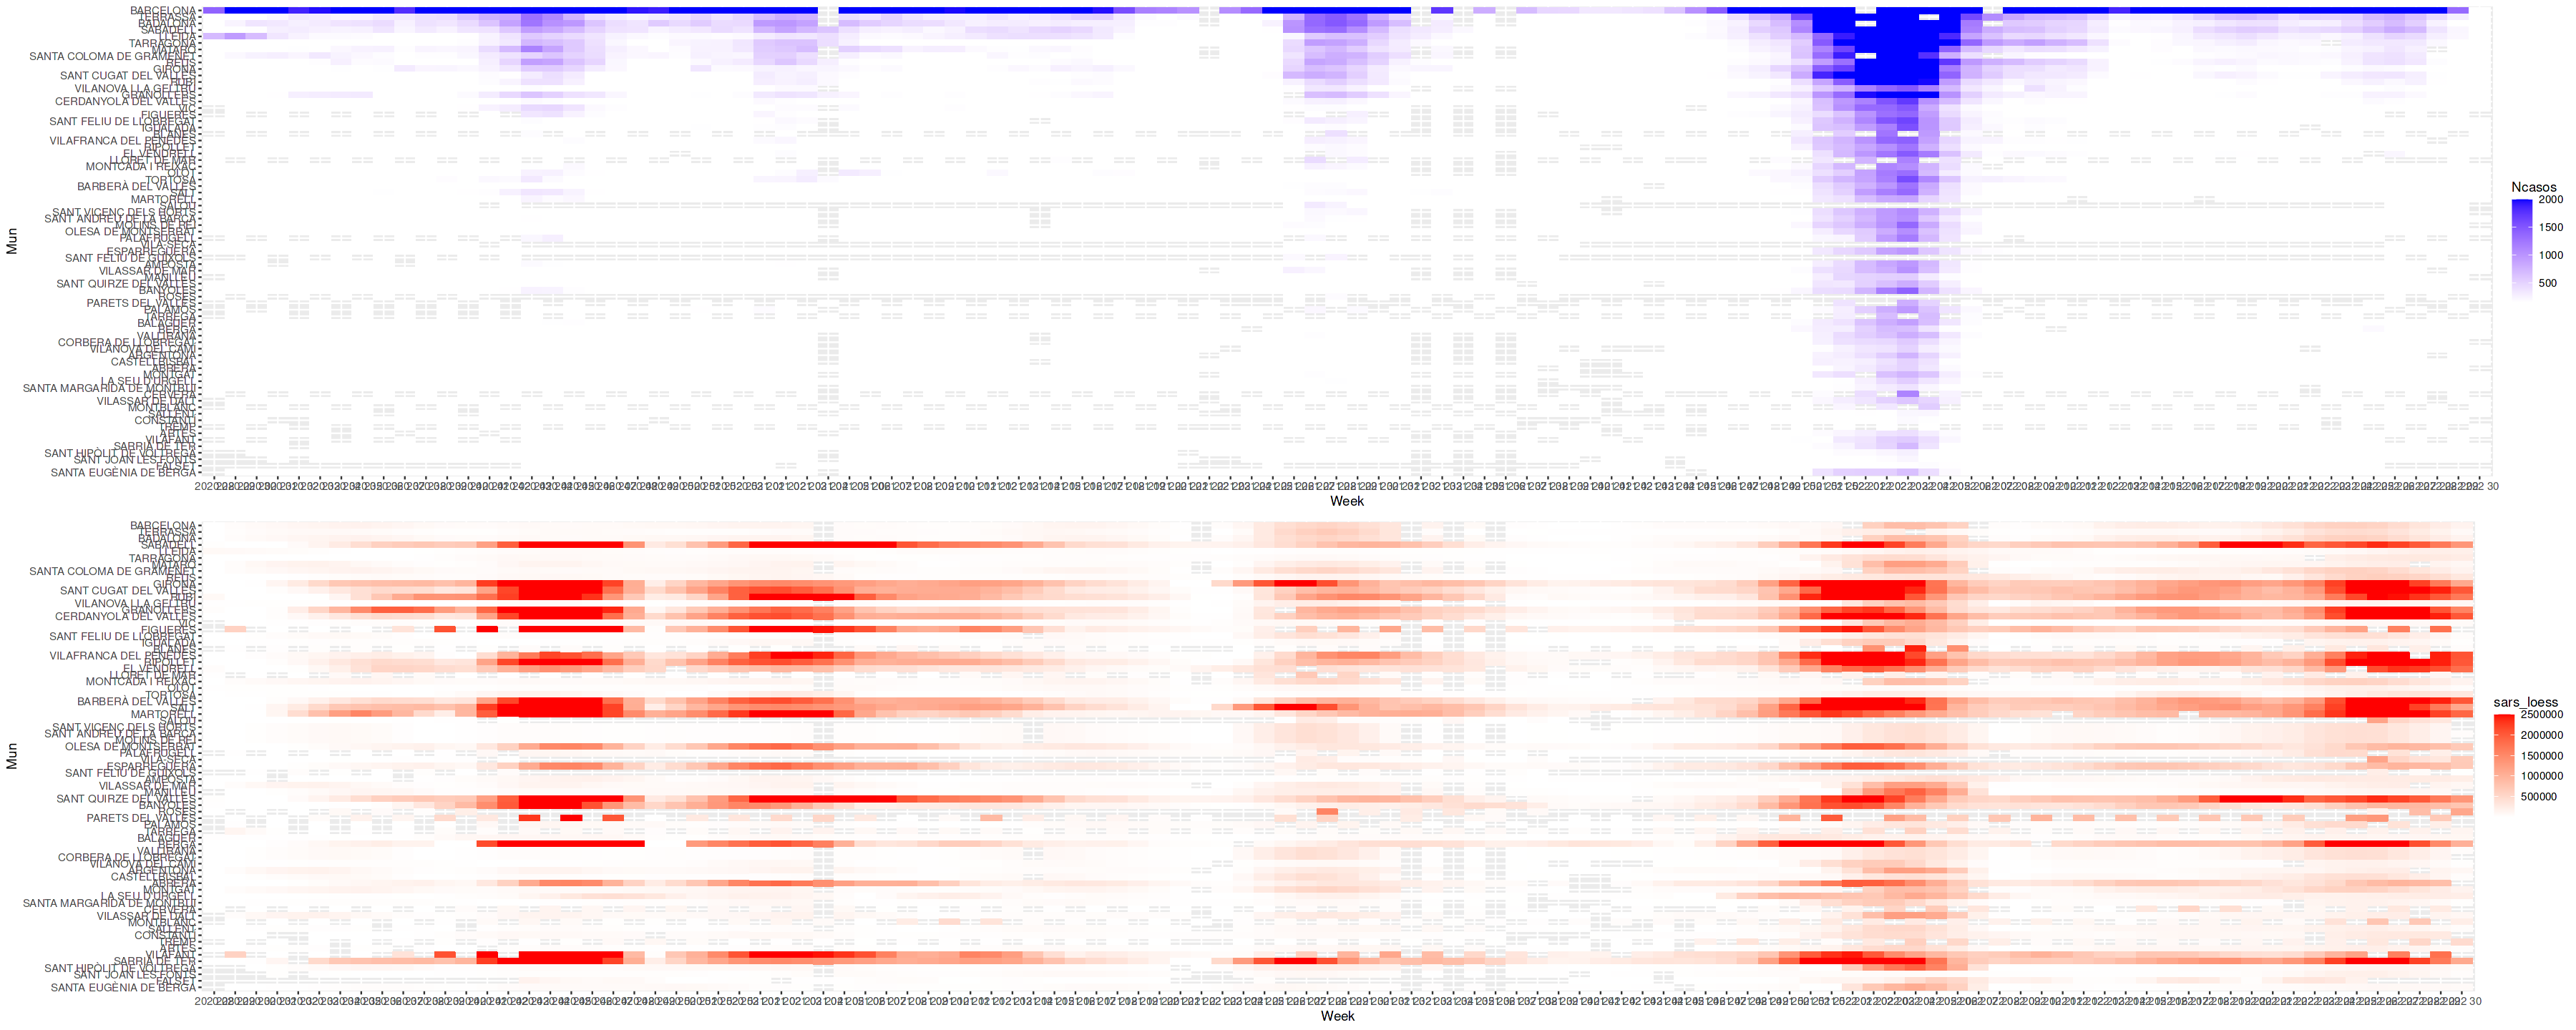

In [115]:
options(repr.plot.width = 30, repr.plot.height = 12)
df2 <- df
df2$Ncasos <- pmin(df2$Ncasos, 2000)
df2$Ncasos <- pmax(df2$Ncasos, 150)
df2$sars_loess <- pmin(df2$sars_loess, 2500000)
df2$sars_loess <- pmax(df2$sars_loess, 1)
g1 <- ggplot(df2, aes(x = Week, y = Mun, fill = Ncasos)) +
    geom_tile()+
    scale_fill_gradient(low = "white", high = "blue")
g2 <- ggplot(df2, aes(x = Week, y = Mun, fill = sars_loess)) +
    geom_tile()+
    scale_fill_gradient(low = "white", high = "red")

plot_grid(
    g1,g2,
    nrow = 2,
    ncol = 1
)

# Second Iteration

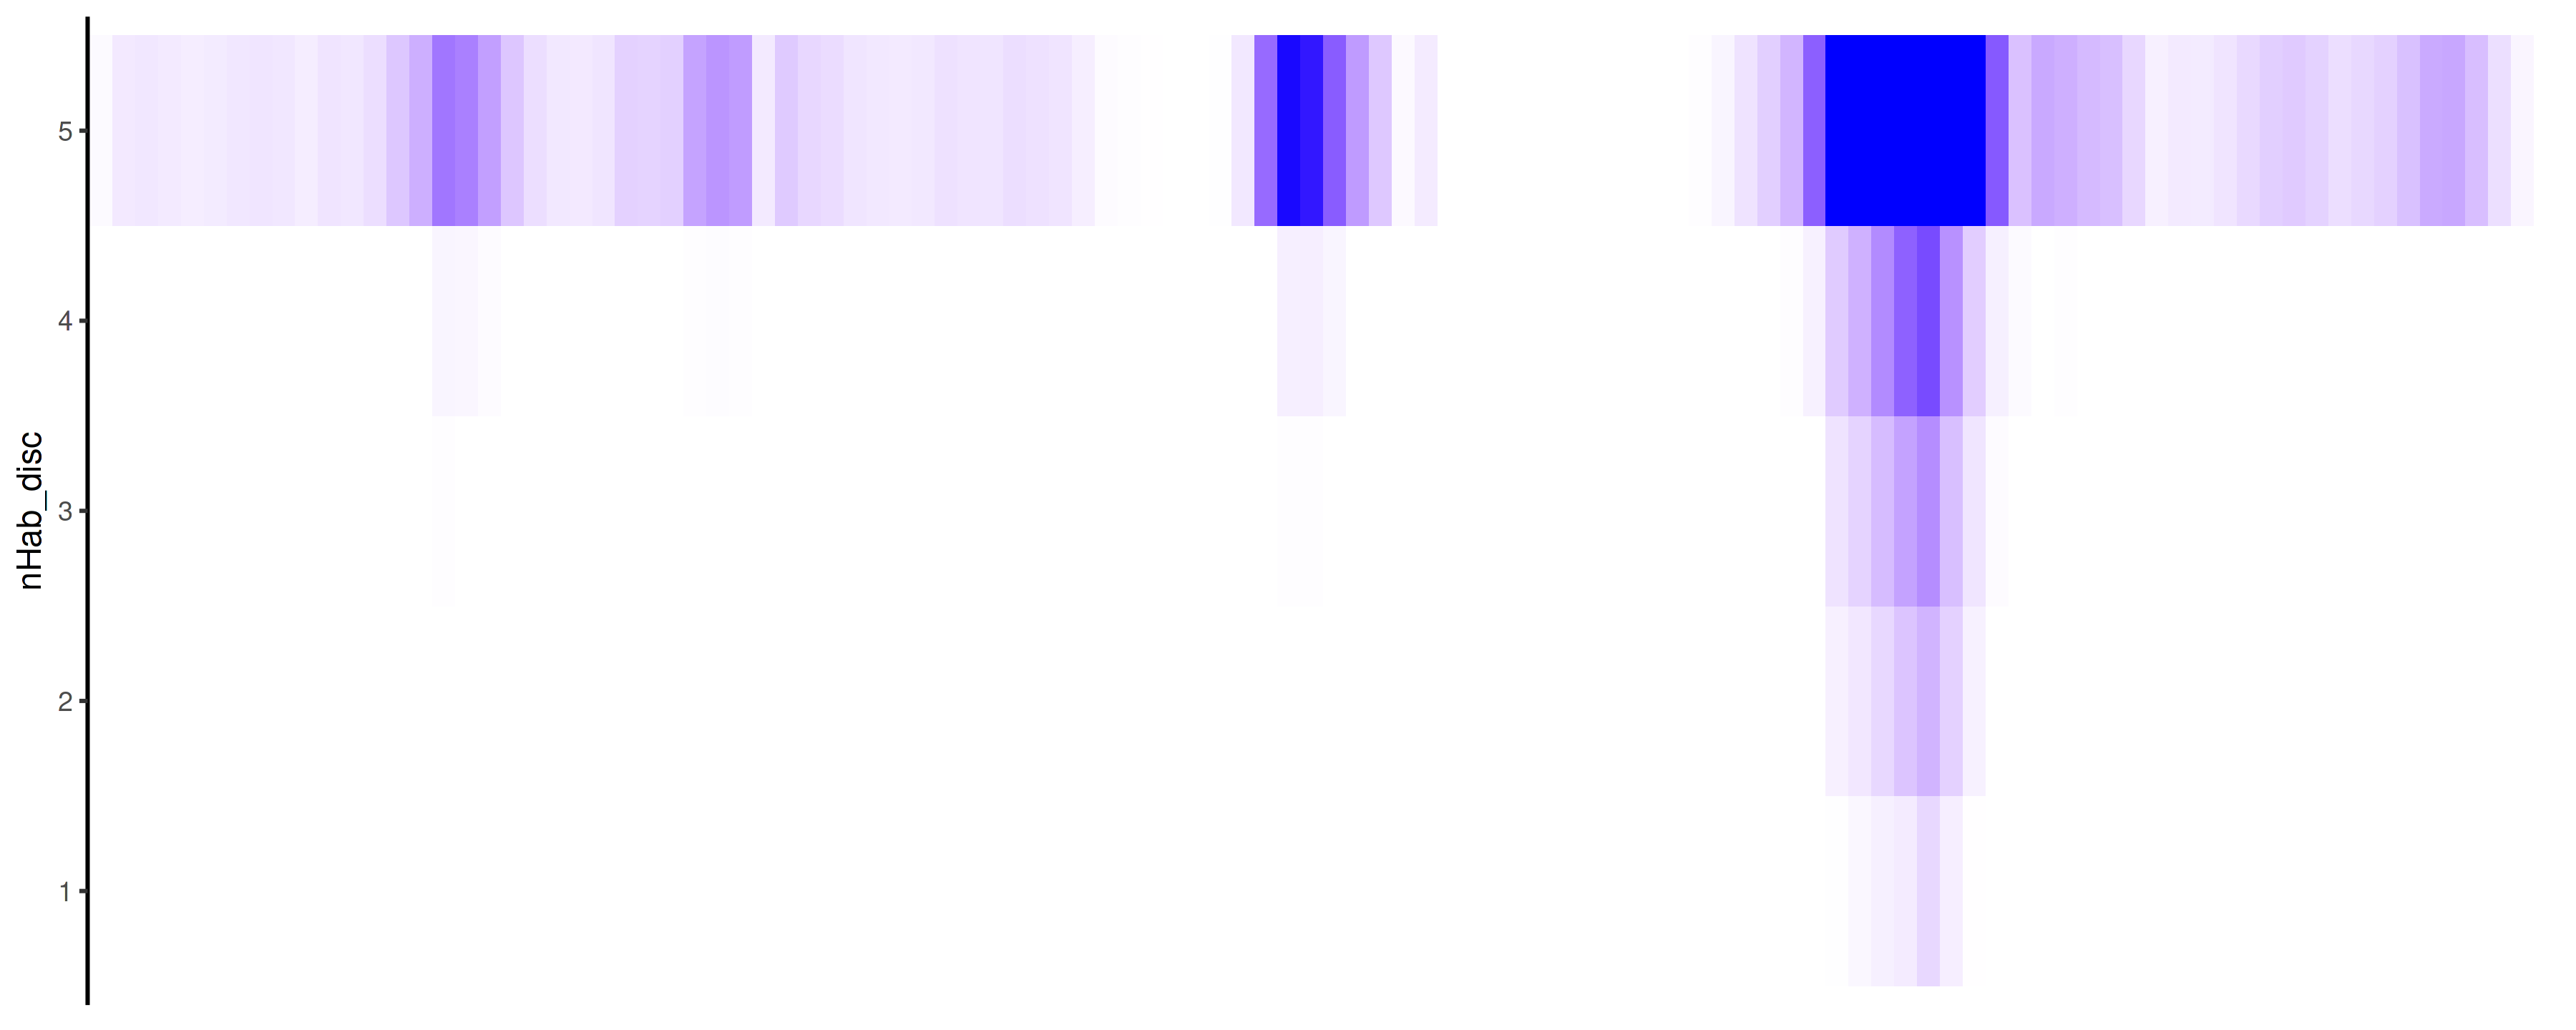

In [116]:
ggplot(df_disc2, aes(x = Week, y = nHab_disc, fill = sum_cases)) +
    geom_tile()+
    scale_fill_gradient(low = "white", high = "blue") +
    theme_classic(base_size = 28) +
    theme(legend.position = 'none',
        axis.text.x=element_blank(), 
        axis.ticks.x=element_blank(),
        axis.line.x = element_blank(),
        axis.title.x = element_blank()
        )


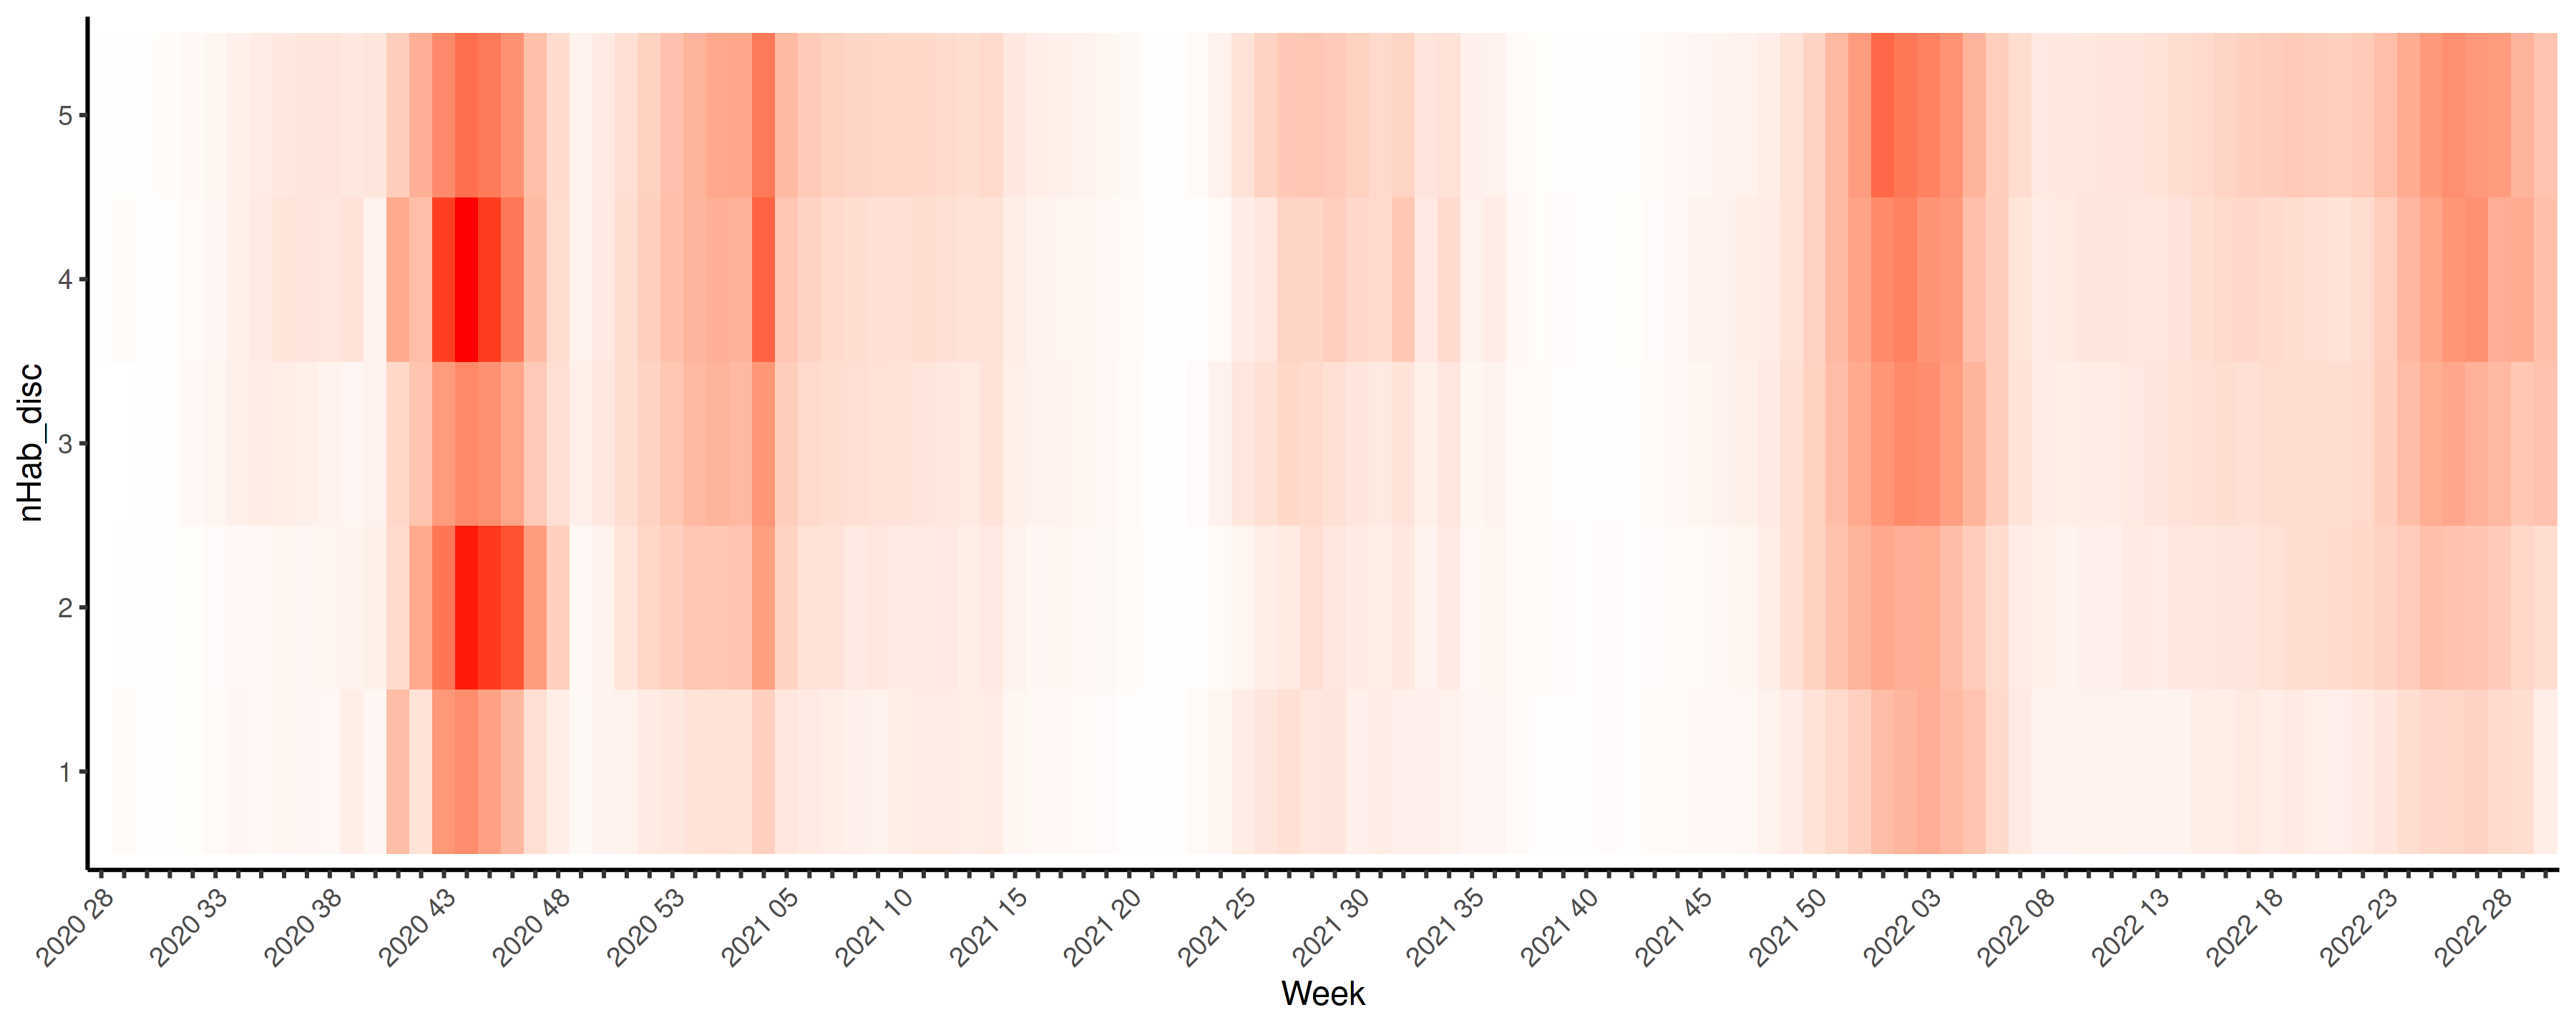

In [82]:
nbreaks <- seq(1, length(unique(df_disc2$Week)), 5)
nall <- length(unique(df_disc2$Week))
labels <- rep("", nall)
breaks <- unique(df_disc2$Week)[nbreaks]

labels[nbreaks] = as.character(unique(df_disc2$Week)[nbreaks])
ggplot(df_disc2, aes(x = Week, y = nHab_disc, fill = sum_sars)) +
    geom_tile() +
    scale_fill_gradient(low = "white", high = "red") +
        theme_classic(base_size = 28) +
    theme(legend.position = 'none',
        axis.text.x= element_text(angle = 45, hjust = 1),
        ) +
    scale_x_discrete(breaks = unique(df_disc2$Week), labels = labels) +
    theme(axis.ticks.x = element_line())

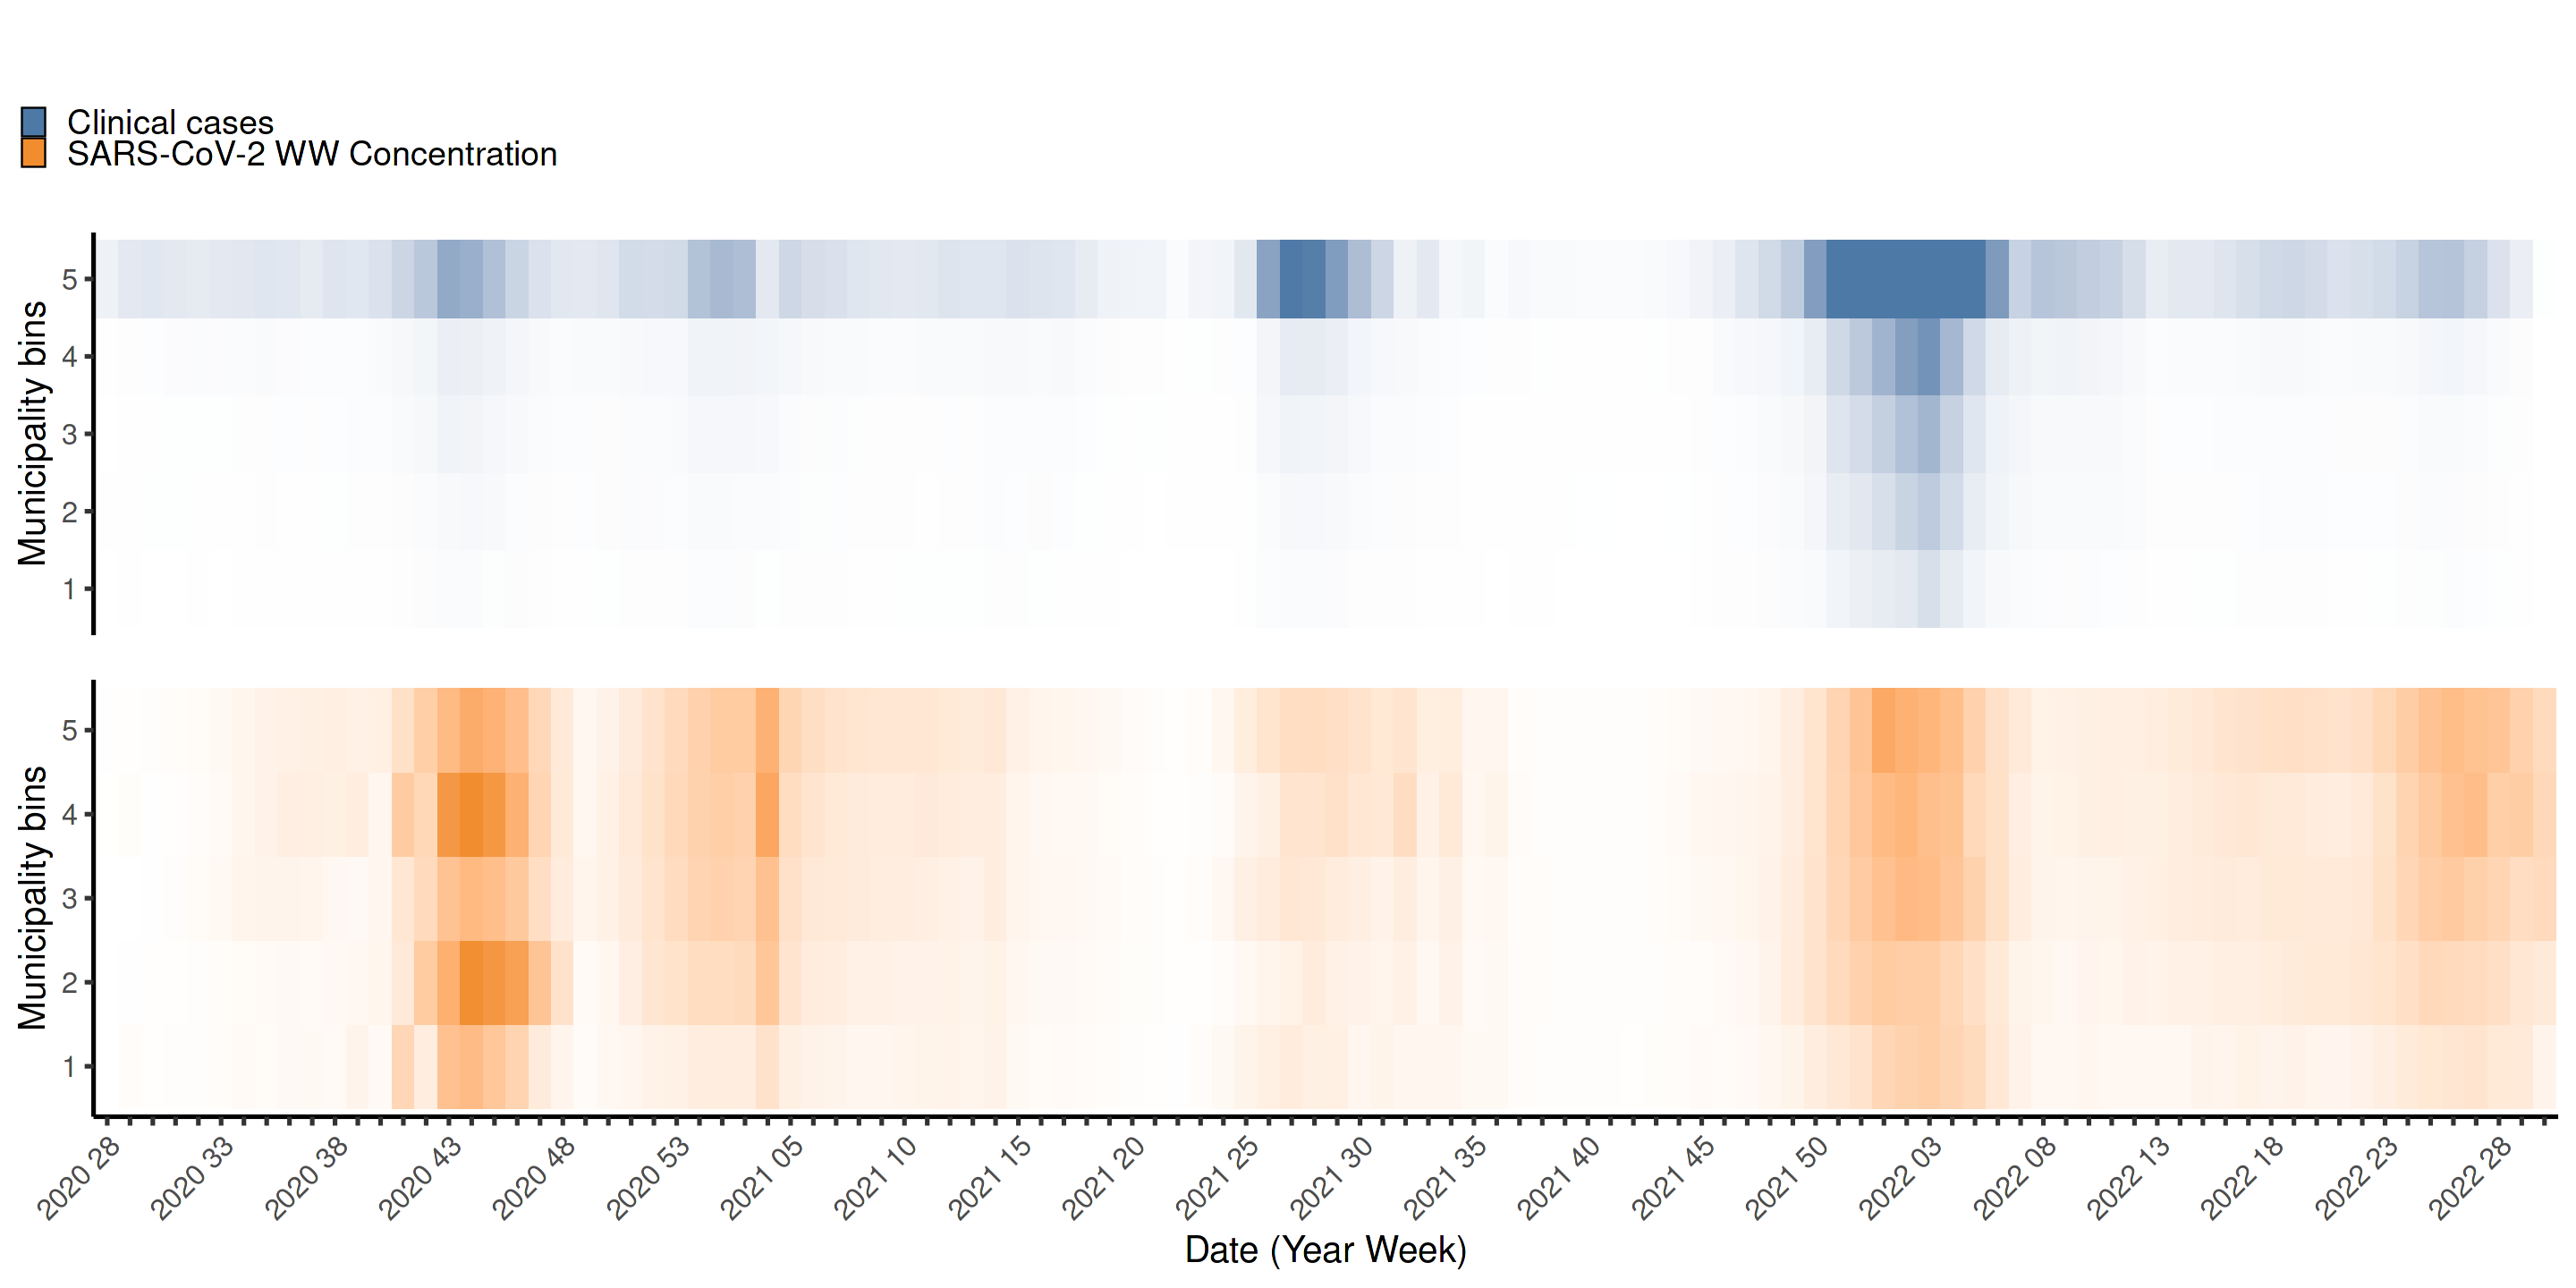

In [117]:
options(repr.plot.width = 24, repr.plot.height = 12)

df_disc2 <- df_disc
df_disc2$sum_cases <- pmin(df_disc2$sum_cases, 2000)
df_disc2$sum_cases <- pmax(df_disc2$sum_cases, 0)
df_disc2$sum_sars <- pmin(df_disc2$sum_sars, 2500000)
df_disc2$sum_sars <- pmax(df_disc2$sum_sars, 1)

nbreaks <- seq(1, length(unique(df_disc2$Week)), 5)
nall <- length(unique(df_disc2$Week))
labels <- rep("", nall)
breaks <- unique(df_disc2$Week)[nbreaks]
labels[nbreaks] = as.character(unique(df_disc2$Week)[nbreaks])
bsize = 24

ylab = "Municipality bins"

g1 <- ggplot(df_disc2, aes(x = Week, y = nHab_disc, fill = sum_cases)) +
    geom_tile()+
    scale_fill_gradient(low = "white", high = "#4d79a6") +
    theme_classic(base_size = bsize) +
    theme(legend.position = 'none',
        axis.text.x=element_blank(), 
        axis.ticks.x=element_blank(),
        axis.line.x = element_blank(),
        axis.title.x = element_blank()
        ) +
    ylab(ylab) 


g2 <- ggplot(df_disc2, aes(x = Week, y = nHab_disc, fill = sum_sars)) +
    geom_tile() +
    scale_fill_gradient(low = "white", high = "#f18d2e") +
        theme_classic(base_size = bsize) +
    theme(legend.position = 'none',
        axis.text.x= element_text(angle = 45, hjust = 1),
        ) +
    scale_x_discrete(breaks = unique(df_disc2$Week), labels = labels) +
    theme(axis.ticks.x = element_line()) +
    ylab(ylab) +
    xlab("Date (Year Week)")

df_fill <- data.frame(x = c(1,2,3), y = c(1,2,3), z = c("Clinical cases", "Clinical cases", "SARS-CoV-2 WW Concentration"))
for_legend <- ggplot(df_fill, aes(y = y, fill = z)) +
    geom_bar(color = "black") +
    scale_fill_manual(
        values = c("Clinical cases" = "#4d79a6", "SARS-CoV-2 WW Concentration" = "#f18d2e")
    ) +
    theme_bw(base_size = bsize+4 ) +
    labs(fill = "") +
    theme(legend.position = "top",
          legend.justification = "left",
          legend.direction = "vertical",
          legend.box = "vertical",
          legend.box.just = "right")
legend <- get_legend(for_legend)


plot <- plot_grid(
    g1,g2,
    nrow = 2,
    ncol = 1,
    rel_heights = c(1,1.4)
)

final <- plot_grid(
    legend,
    plot,
    rel_heights = c(.2,1),
    ncol = 1
)

# ggsave(filename = "./figures/evolution2412.svg",
#         height = 12,
#         width = 24)
final

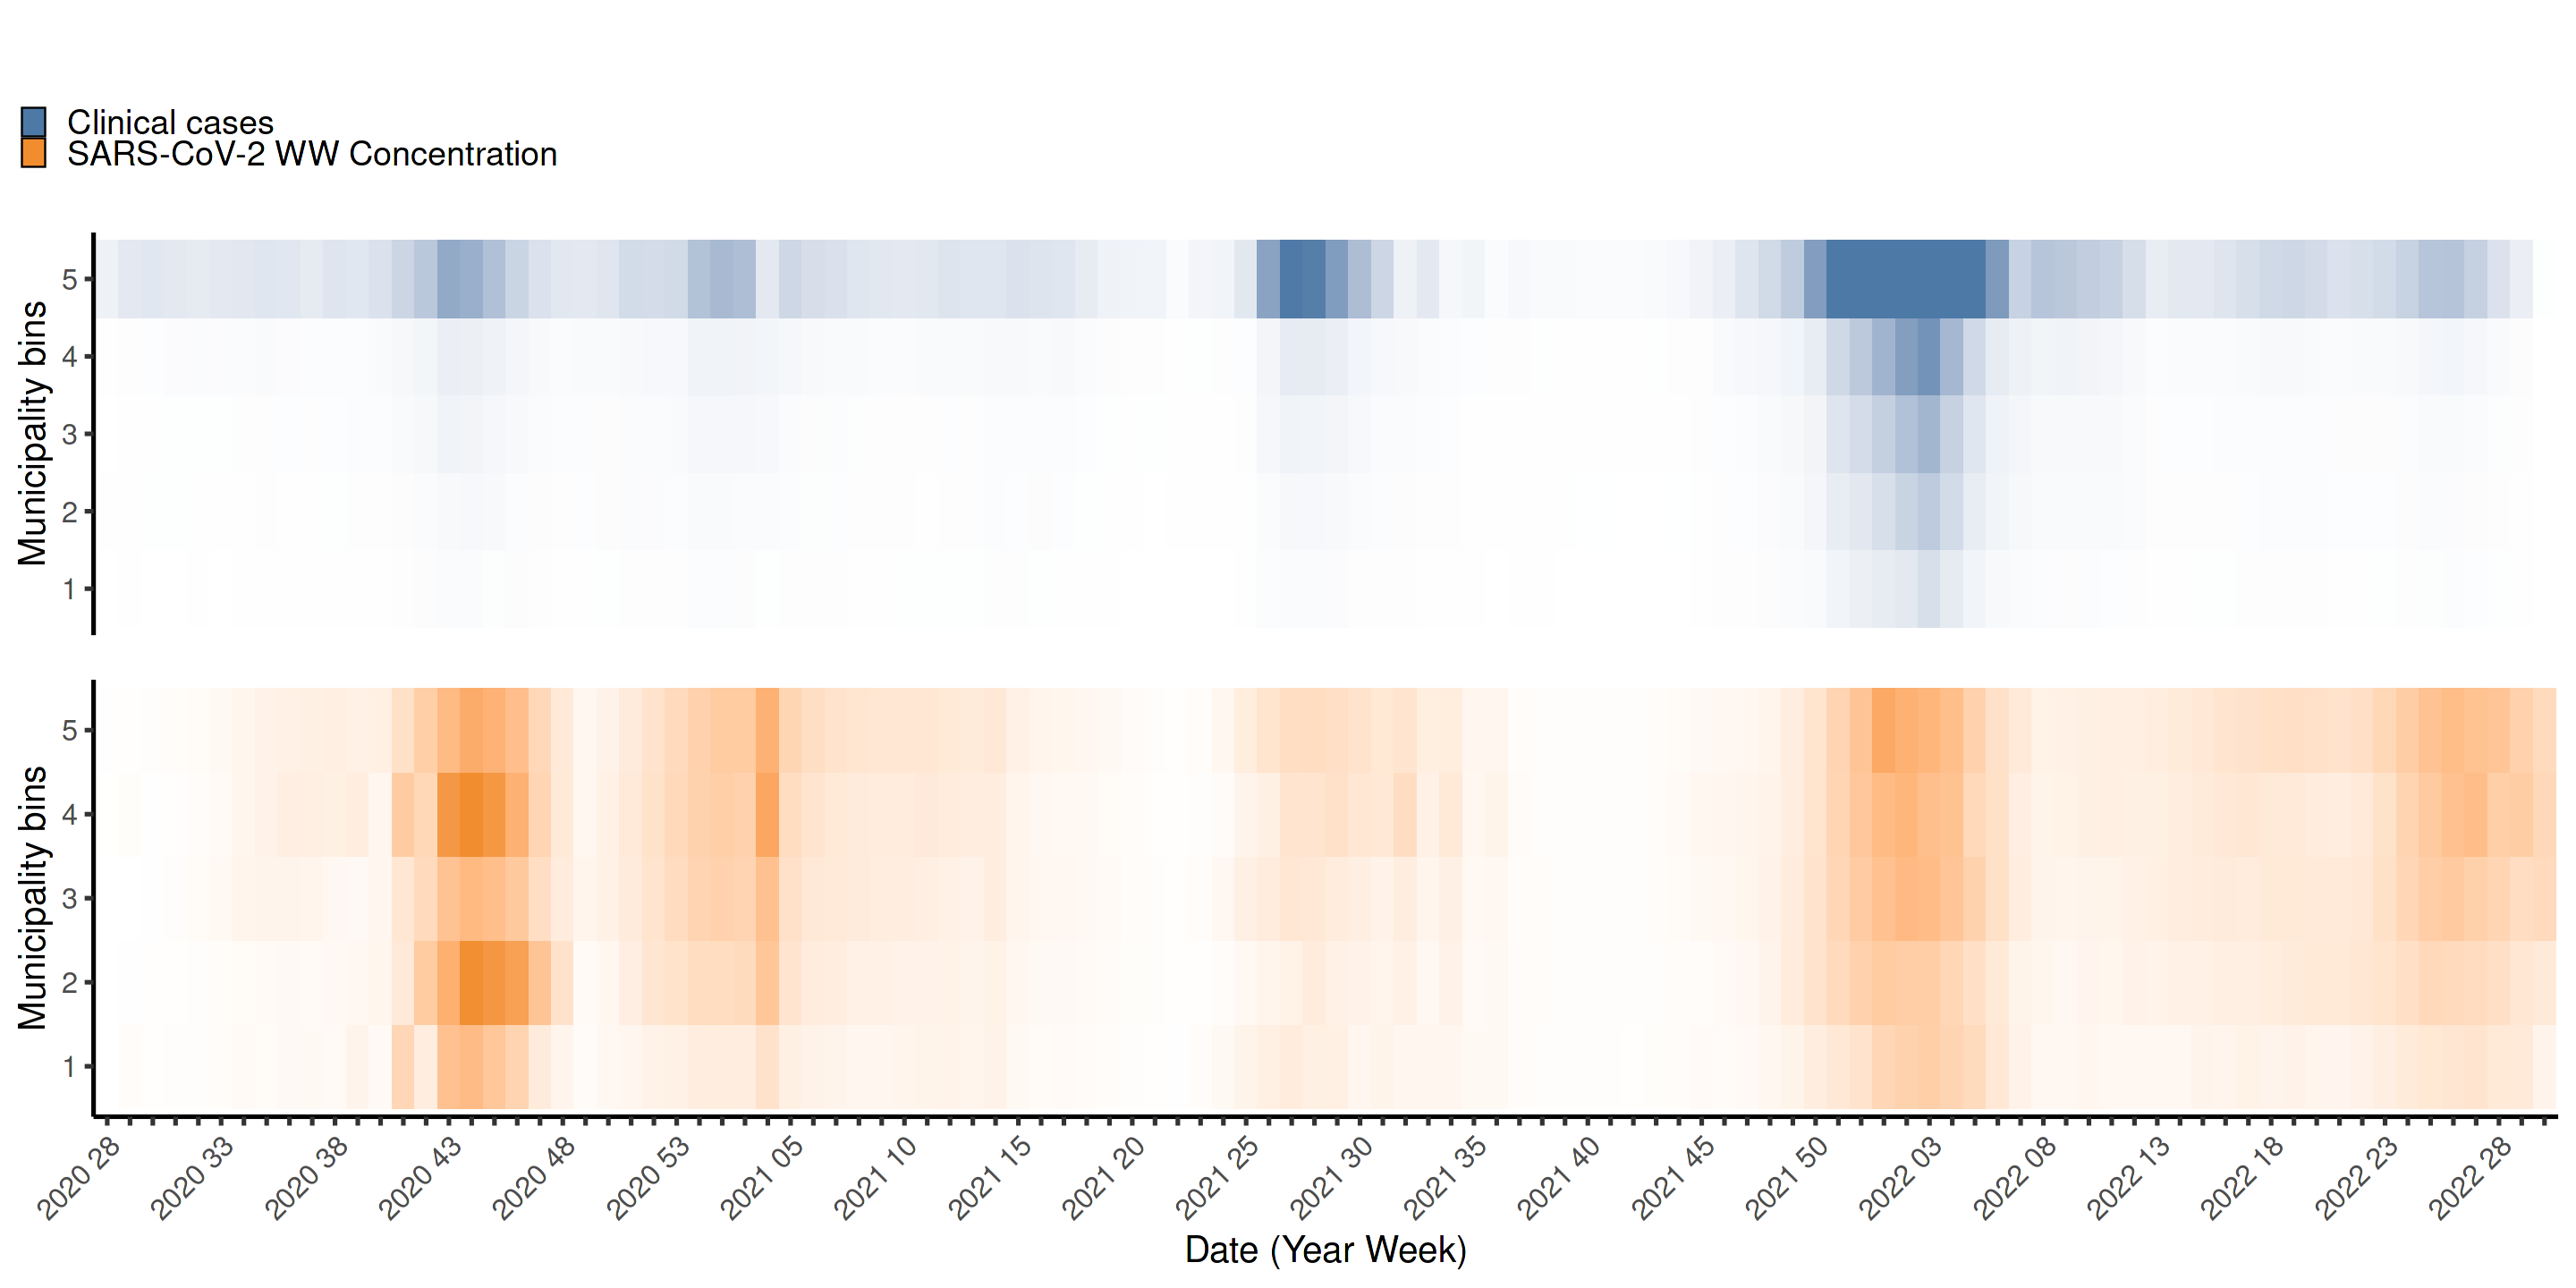

In [118]:
final

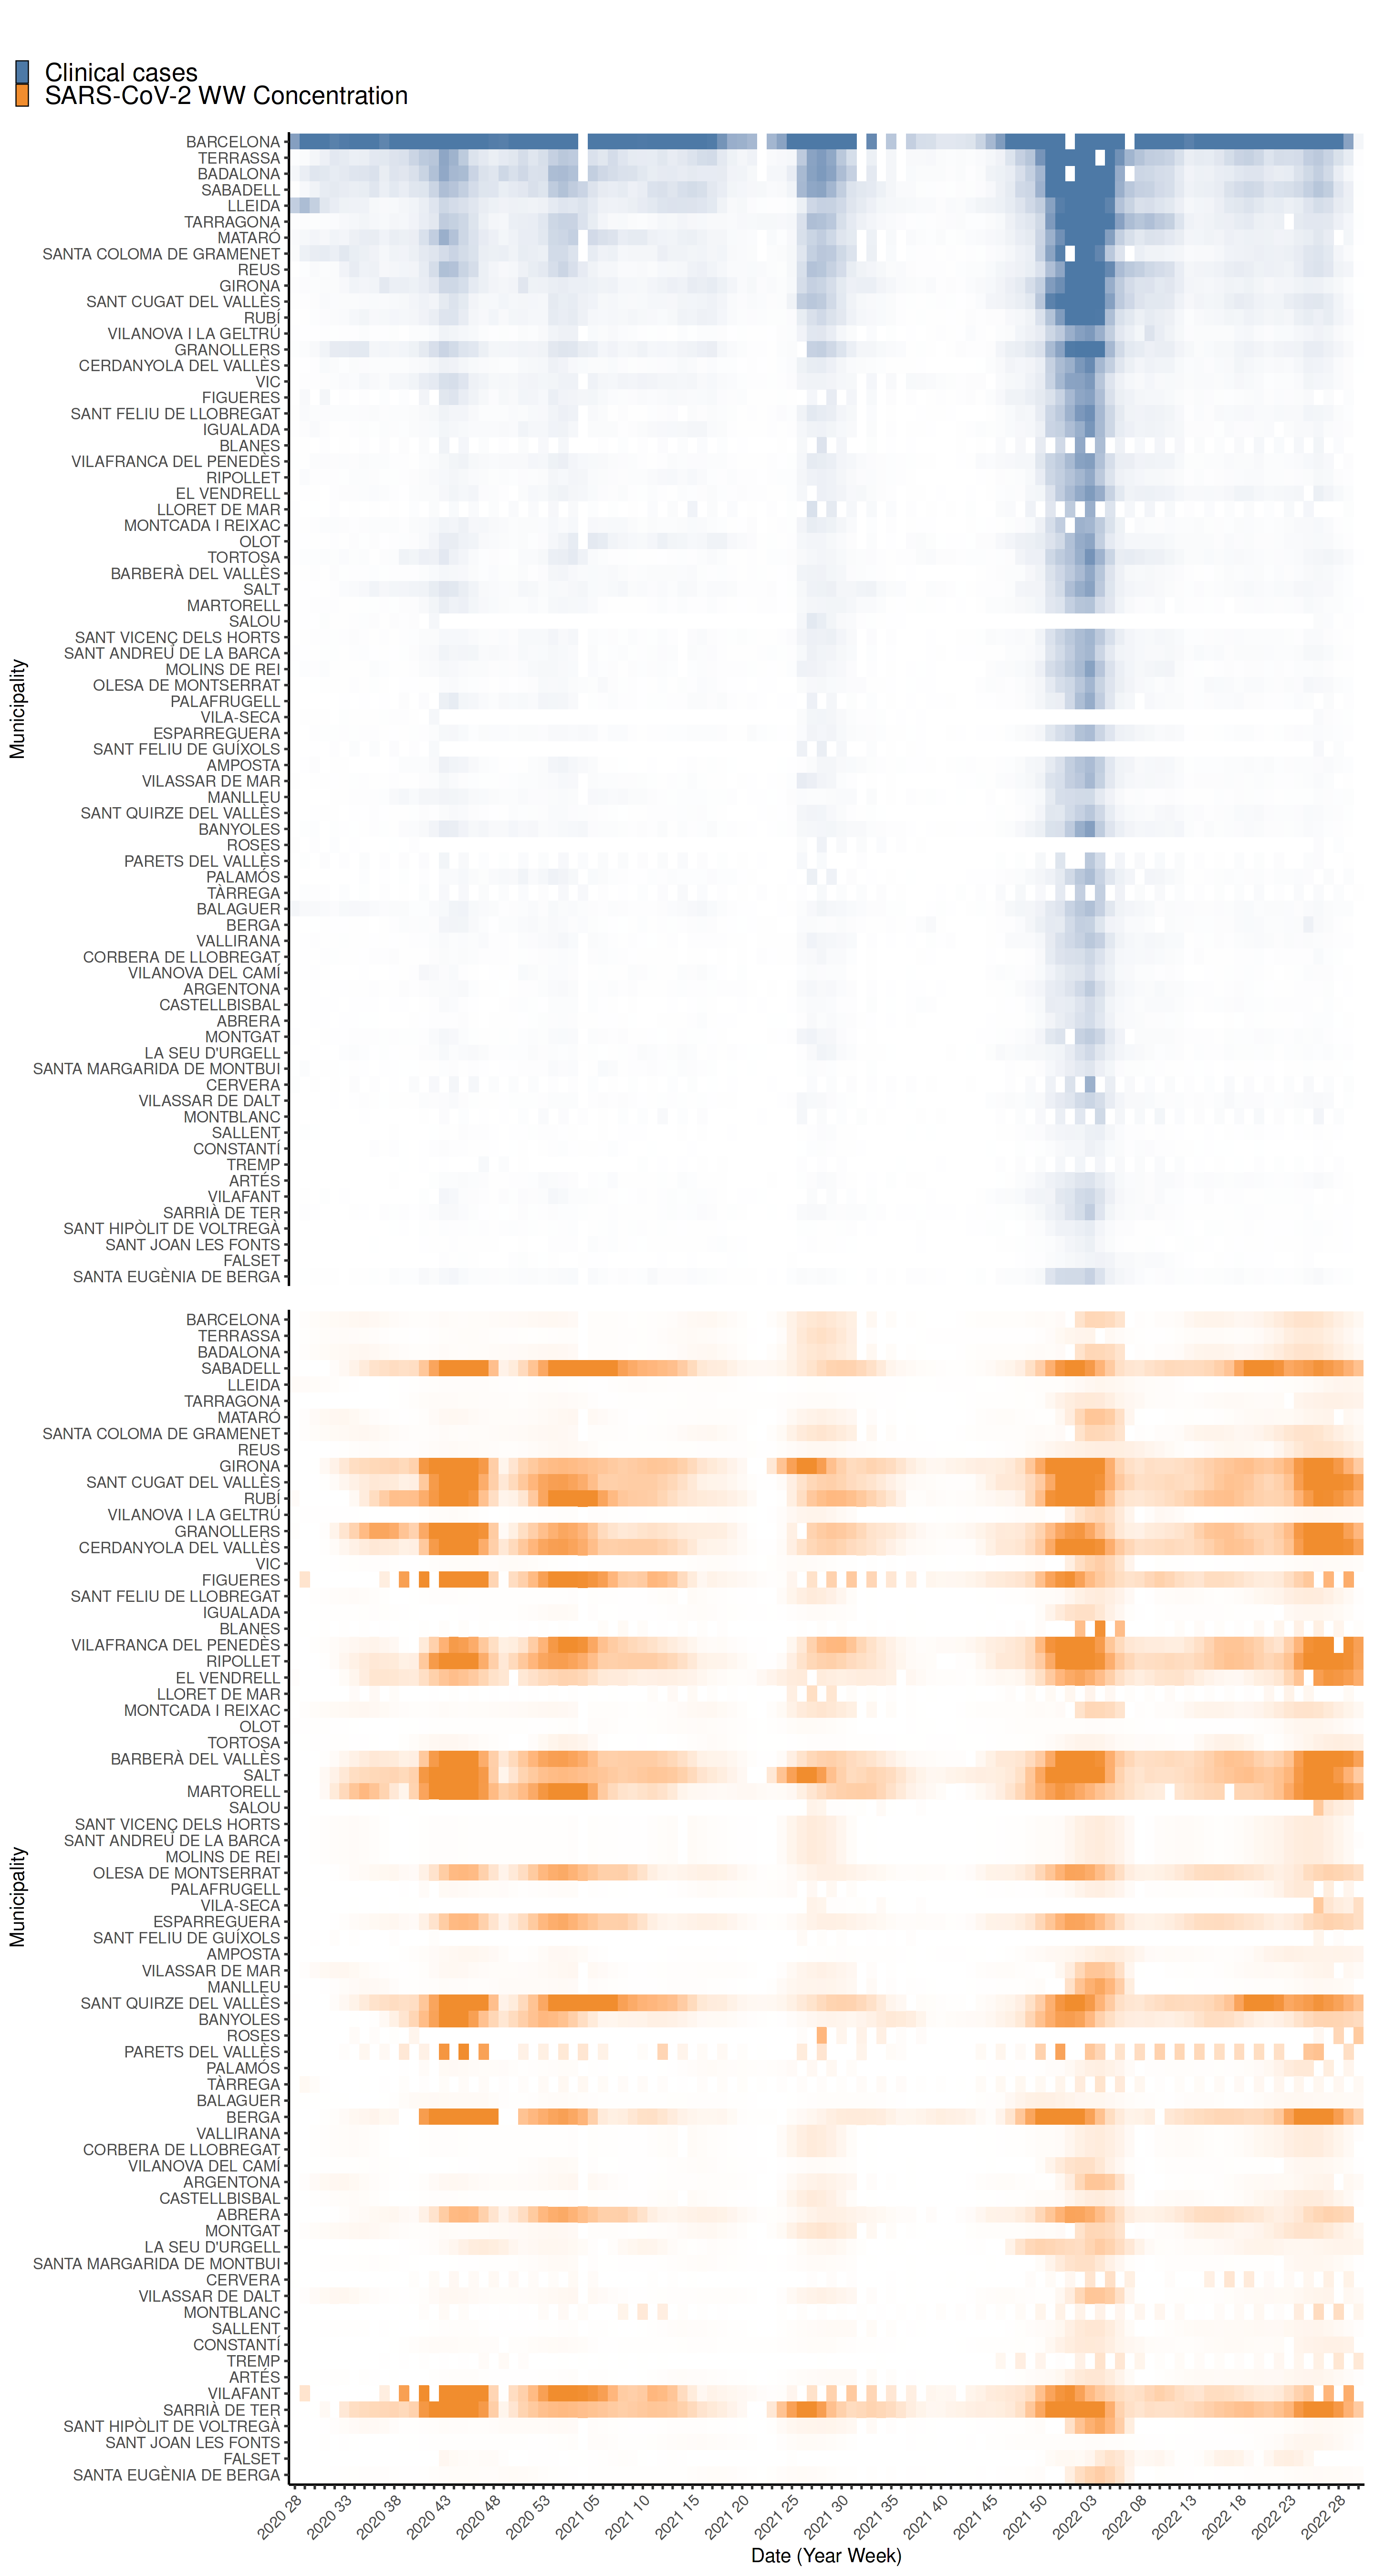

In [121]:
options(repr.plot.width = 24, repr.plot.height = 45)
df2 <- df
df2$Ncasos <- pmin(df2$Ncasos, 2000)
df2$Ncasos <- pmax(df2$Ncasos, 0)
df2$sars_loess <- pmin(df2$sars_loess, 2500000)
df2$sars_loess <- pmax(df2$sars_loess, 1)

nbreaks <- seq(1, length(unique(df2$Week)), 5)
nall <- length(unique(df2$Week))
labels <- rep("", nall)
breaks <- unique(df2$Week)[nbreaks]
labels[nbreaks] = as.character(unique(df2$Week)[nbreaks])
bsize = 24

ylab = "Municipality"


g1 <- ggplot(df2, aes(x = Week, y = Mun, fill = Ncasos)) +
    geom_tile()+
    scale_fill_gradient(low = "white", high = "#4d79a6") +
    theme_classic(base_size = bsize) +
    theme(legend.position = 'none',
        axis.text.x=element_blank(), 
        axis.ticks.x=element_blank(),
        axis.line.x = element_blank(),
        axis.title.x = element_blank()
        ) +
    ylab(ylab) 

g2 <- ggplot(df2, aes(x = Week, y = Mun, fill = sars_loess)) +
    geom_tile()+
    scale_fill_gradient(low = "white", high = "#f18d2e") +
        theme_classic(base_size = bsize) +
    theme(legend.position = 'none',
        axis.text.x= element_text(angle = 45, hjust = 1),
        ) +
    scale_x_discrete(breaks = unique(df_disc2$Week), labels = labels) +
    theme(axis.ticks.x = element_line()) +
    ylab(ylab) +
    xlab("Date (Year Week)")

df_fill <- data.frame(x = c(1,2,3), y = c(1,2,3), z = c("Clinical cases", "Clinical cases", "SARS-CoV-2 WW Concentration"))
for_legend <- ggplot(df_fill, aes(y = y, fill = z)) +
    geom_bar(color = "black") +
    scale_fill_manual(
        values = c("Clinical cases" = "#4d79a6", "SARS-CoV-2 WW Concentration" = "#f18d2e")
    ) +
    theme_bw(base_size = bsize+15 ) +
    labs(fill = "") +
    theme(legend.position = "top",
          legend.justification = "left",
          legend.direction = "vertical",
          legend.box = "vertical",
          legend.box.just = "right")
legend <- get_legend(for_legend)

plot <- plot_grid(
    g1,g2,
    nrow = 2,
    ncol = 1,
    rel_heights = c(1.2,1.3)
)

final <- plot_grid(
    legend,
    plot,
    rel_heights = c(.05,1),
    ncol = 1
)
final
ggsave(final,
        filename = "./figures/evolution_supp.svg",
        height = 45,
        width = 24)